In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import py3Dmol # Visualising 3D structures; install with pip install py3Dmol
import os

filePathDomainome = "data/Supplementary_Table_2_fitness_scores_normalized.txt"
filePathPredictMegascale = "data/mega_scale_with_preds.csv"
filePathMegascale = "data/mega_train.csv"
dataDomainome = pd.read_csv(filePathDomainome, sep="\t")
dataMegascale = pd.read_csv(filePathMegascale, sep=",")
dataPredictMegascale = pd.read_csv(filePathPredictMegascale, sep=",")

In [3]:

# Find the highest value in the 'mutation_pos' column
highest_value = dataPredictMegascale['mutation_pos'].max()

print("The highest value in the 'mutation_pos' column is:", highest_value)

The highest value in the 'mutation_pos' column is: 71


In [41]:
###Filter PredictData
predictDataFiltered = dataPredictMegascale[["ddG_ML", "mut_type", "mutation_pos", "mutation_to", "prediction_mega", "y_true_mega", "prediction_dom", "y_true_dom"]]
predictDataFiltered = predictDataFiltered[predictDataFiltered["mut_type"] != "wt"]
predictDataFiltered["mutation"] = predictDataFiltered["mut_type"].str[0] + predictDataFiltered["mut_type"].str[-1]
predictDataFiltered.loc[:, 'wt_aa'] = predictDataFiltered['mutation'].str[0]
predictDataFiltered.loc[:, 'mut_aa'] = predictDataFiltered['mutation'].str[1]
predictDataFiltered

,ddG_ML,mut_type,mutation_pos,mutation_to,prediction_mega,y_true_mega,prediction_dom,y_true_dom,mutation,wt_aa,mut_aa
0,0.274618,S1A,0,0,0.244867,0.274618,0.268696,0.274618,SA,S,A
1,0.391416,S1C,0,1,0.295403,0.391416,0.253038,0.391416,SC,S,C
2,0.329590,S1D,0,2,0.223768,0.329590,0.324191,0.329590,SD,S,D
3,0.269378,S1E,0,3,0.187730,0.269378,0.344384,0.269378,SE,S,E
4,0.456613,S1F,0,4,0.238422,0.456613,0.258794,0.456613,SF,S,F
...,...,...,...,...,...,...,...,...,...,...,...
215726,0.341185,V48N,47,11,0.090213,0.341185,0.237484,0.341185,VN,V,N
215727,0.360601,V48P,47,12,0.098666,0.360601,0.261444,0.360601,VP,V,P
215728,0.341126,V48Q,47,13,0.117495,0.341126,0.264686,0.341126,VQ,V,Q
215729,0.330819,V48S,47,15,0.117521,0.330819,0.276653,0.330819,VS,V,S


In [11]:
###setting save directory. Gets the directory of the script
script_dir = os.getcwd()
plots_dir = os.path.join(script_dir, "plots")
# Create the "plots" directory if it does not exist
os.makedirs(plots_dir, exist_ok=True)

In [58]:
# Define a function to format the x-axis ticks as integers which is needed for the Heatmaps
def format_tick(val, pos):
    return f"{int(val)}"

In [61]:
# preprocess data
# first add a row with wt_seq, wt_name and mut_type columns and position starting with zero
# group by domain_ID, get first row, get sequence, change the * in the sequence to the wt_aa
# group  df by domain_ID
df = dataDomainome.groupby("domain_ID")

# for each group get minimum position
df_min = df["position"].min()
# subtract this from data 
dataDomainome["position_abs"] = dataDomainome.apply(lambda x: x["position"] - df_min[x["domain_ID"]], axis=1)

# for each group get first row and get the sequence
df_first = df.first()

def replace_star(row):
    seq = row["aa_seq"]
    wt_aa = row["wt_aa"]
    return seq.replace("*", wt_aa)

df_first['aa_seq'] = df_first.apply(replace_star, axis=1)

# replace the aa_seq column with the corrected sequence, for whole df
dataDomainome["aa_seq"] = dataDomainome["domain_ID"].map(df_first["aa_seq"])
dataDomainome

,domain_ID,uniprot_ID,aa_seq,wt_aa,position,mut_aa,STOP,input_count_rep1,input_count_rep2,input_count_rep3,output_count_rep1,output_count_rep2,output_count_rep3,mean_input_count,fitness,fitness_sigma,normalized_fitness,normalized_fitness_sigma,clinical_class,position_abs
0,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,A,1085.0,*,True,73.0,89.0,84.0,1.0,4.0,5.0,82.000000,-0.006228,0.022911,-1.445534,0.317667,NaN,0.0
1,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,*,True,59.0,82.0,78.0,7.0,0.0,0.0,73.000000,0.028656,0.029636,-0.961864,0.410906,NaN,1.0
2,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,A,False,190.0,223.0,191.0,133.0,125.0,46.0,201.333333,0.075688,0.006956,-0.309755,0.096451,NaN,1.0
3,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,*,True,161.0,179.0,149.0,3.0,2.0,13.0,163.000000,-0.001982,0.017544,-1.386659,0.243252,NaN,2.0
4,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,A,False,150.0,161.0,128.0,74.0,48.0,56.0,146.333333,0.069597,0.008001,-0.394199,0.110932,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602877,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,S,False,137.0,134.0,136.0,650.0,652.0,749.0,135.666700,0.186037,0.009829,-0.077343,0.123553,NaN,2.0
602878,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,T,False,99.0,102.0,122.0,632.0,502.0,513.0,107.666700,0.187877,0.010987,-0.054211,0.138114,NaN,2.0
602879,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,V,False,179.0,245.0,413.0,206.0,306.0,559.0,279.000000,0.139785,0.007840,-0.658761,0.098556,NaN,2.0
602880,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,W,False,674.0,834.0,833.0,1678.0,1516.0,936.0,780.333300,0.152394,0.004906,-0.500250,0.061666,NaN,2.0


In [62]:
#Filter Dataset
dataDomainomeFiltered = dataDomainome[["domain_ID", "uniprot_ID", "aa_seq", "wt_aa", "position", "position_abs", "mut_aa", "normalized_fitness"]]
dataDomainomeFiltered = dataDomainomeFiltered[dataDomainomeFiltered['mut_aa'] != '*']

dataDomainomeFiltered['mutation'] = dataDomainomeFiltered['wt_aa']+ dataDomainomeFiltered['mut_aa']
dataDomainomeFiltered

,domain_ID,uniprot_ID,aa_seq,wt_aa,position,position_abs,mut_aa,normalized_fitness,mutation
2,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,1.0,A,-0.309755,CA
4,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,2.0,A,-0.394199,EA
5,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,2.0,C,0.096326,EC
6,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,2.0,D,0.184738,ED
8,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,Q,1088.0,3.0,A,-0.273774,QA
...,...,...,...,...,...,...,...,...,...
602877,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,2.0,S,-0.077343,KS
602878,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,2.0,T,-0.054211,KT
602879,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,2.0,V,-0.658761,KV
602880,Q99615_PF00226_382,Q99615,YYKILGVDKNASEDEIKKAYRKRALMHHPDRHSGASAEVQKEEEKK...,K,384.0,2.0,W,-0.500250,KW


In [69]:
sns.set_context("talk")
sns.set_style("white")

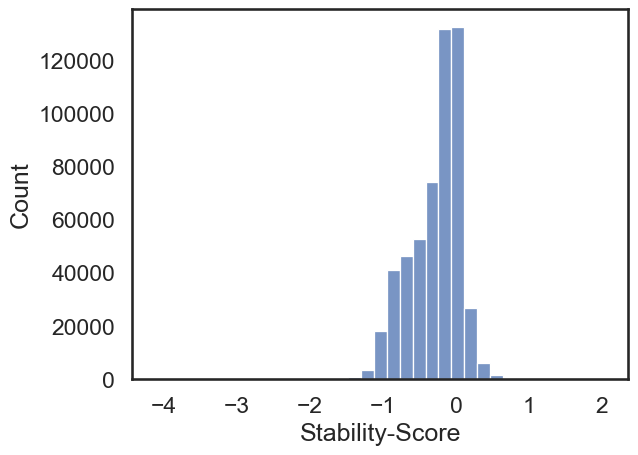

In [64]:
#Plot normalized fitness (ddG) of dataset
sns.histplot(dataDomainomeFiltered,x="normalized_fitness", bins=35)
plt.xlabel("Stability-Score")
# Define the full path for the plot file
save_path = os.path.join(plots_dir, "domainomeStabilityScoreHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

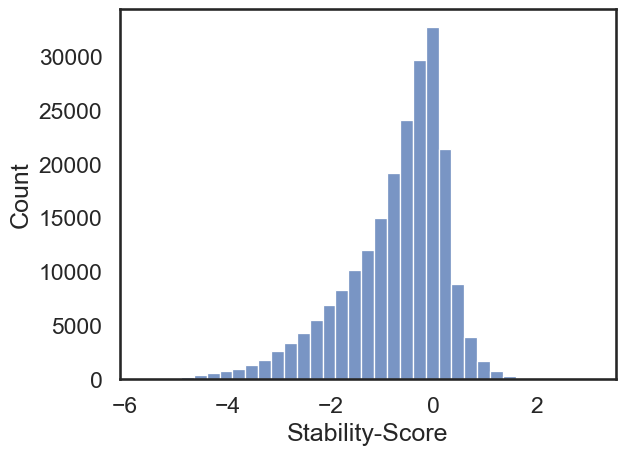

In [65]:
sns.histplot(dataMegascale, x="ddG_ML", bins=35)
plt.xlabel("Stability-Score")
# Define the full path for the plot file
save_path = os.path.join(plots_dir, "MegascaleStabilityScoreHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [8]:
predictDataFiltered

,ddG_ML,mut_type,mutation_pos,mutation_to,prediction_mega,y_true_mega,prediction_dom,y_true_dom,mutation,wt_aa,mut_aa
0,0.274618,S1A,0,0,0.244867,0.274618,0.268696,0.274618,SA,S,A
1,0.391416,S1C,0,1,0.295403,0.391416,0.253038,0.391416,SC,S,C
2,0.329590,S1D,0,2,0.223768,0.329590,0.324191,0.329590,SD,S,D
3,0.269378,S1E,0,3,0.187730,0.269378,0.344384,0.269378,SE,S,E
4,0.456613,S1F,0,4,0.238422,0.456613,0.258794,0.456613,SF,S,F
...,...,...,...,...,...,...,...,...,...,...,...
215726,0.341185,V48N,47,11,0.090213,0.341185,0.237484,0.341185,VN,V,N
215727,0.360601,V48P,47,12,0.098666,0.360601,0.261444,0.360601,VP,V,P
215728,0.341126,V48Q,47,13,0.117495,0.341126,0.264686,0.341126,VQ,V,Q
215729,0.330819,V48S,47,15,0.117521,0.330819,0.276653,0.330819,VS,V,S


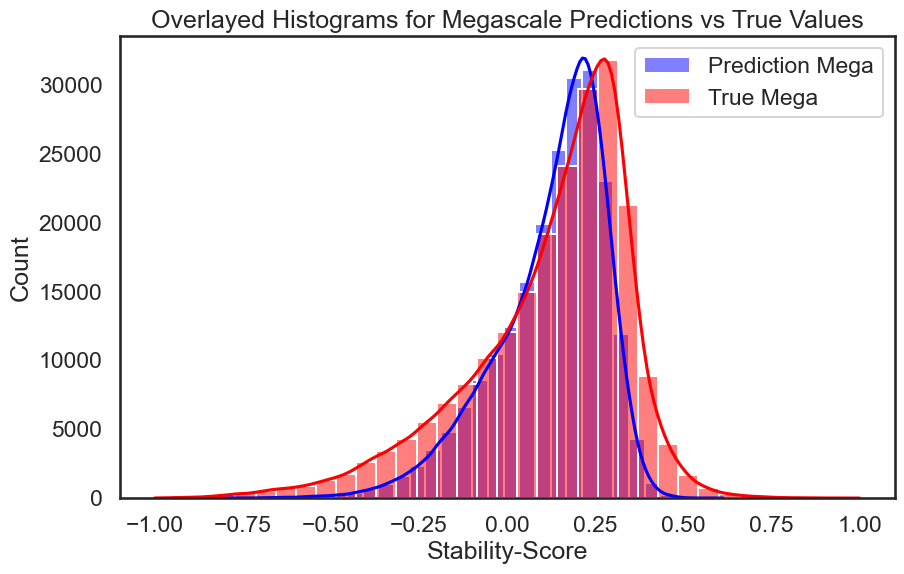

In [70]:
# Plotting histograms for pairs
plt.figure(figsize=(10, 6))

# Overlay 'prediction_mega' and 'y_true_mega'
sns.histplot(predictDataFiltered['prediction_mega'], bins=35, color='blue', label='Prediction Mega', kde=True)
sns.histplot(predictDataFiltered['y_true_mega'], bins=35, color='red', label='True Mega', kde=True)

plt.xlabel("Stability-Score")
plt.legend()
plt.title("Overlayed Histograms for Megascale Predictions vs True Values")
save_path = os.path.join(plots_dir, "MegascaleHistogramPredictionTrueOverlay.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
# Plotting combined histogram for 'prediction_mega' and 'prediction_dom'


In [79]:
# Overlay 'prediction_dom' and 'y_true_dom'
plt.figure(figsize=(10, 6))

sns.histplot(predictDataFiltered['prediction_dom'], bins=35, color='green', label='Prediction Dom', kde=True)
sns.histplot(predictDataFiltered['y_true_dom'], bins=35, color='orange', label='True Dom', kde=True)

plt.xlabel("Stability-Score")
plt.legend()
plt.title("Overlayed Histograms for Domainome Predictions vs True Values")
save_path = os.path.join(plots_dir, "DomainomeHistogramPredictionTrueOverlay.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

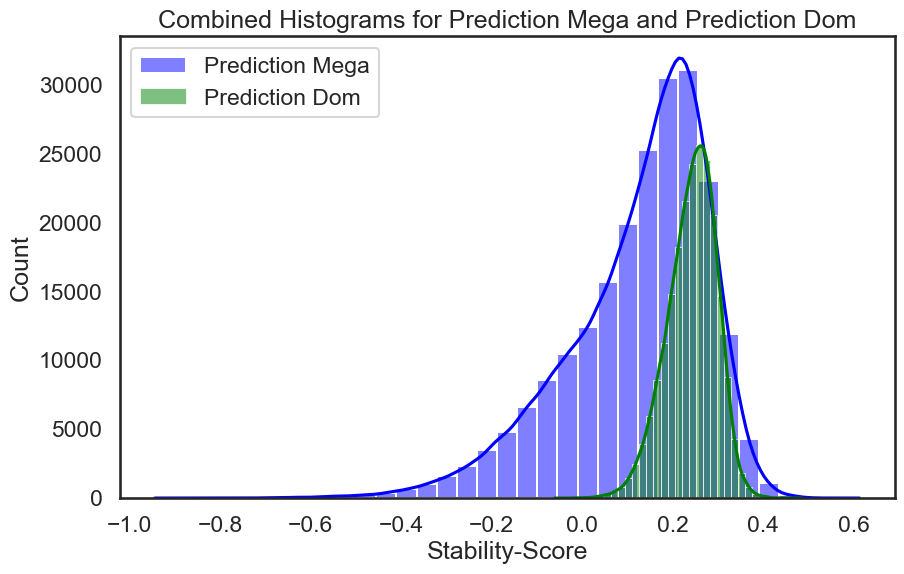

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(predictDataFiltered['prediction_mega'], bins=35, color='blue', label='Prediction Mega', kde=True)
sns.histplot(predictDataFiltered['prediction_dom'], bins=35, color='green', label='Prediction Dom', kde=True)

plt.xlabel("Stability-Score")
plt.legend()
plt.title("Combined Histograms for Prediction Mega and Prediction Dom")
save_path = os.path.join(plots_dir, "HistogramPredictionOverlay.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

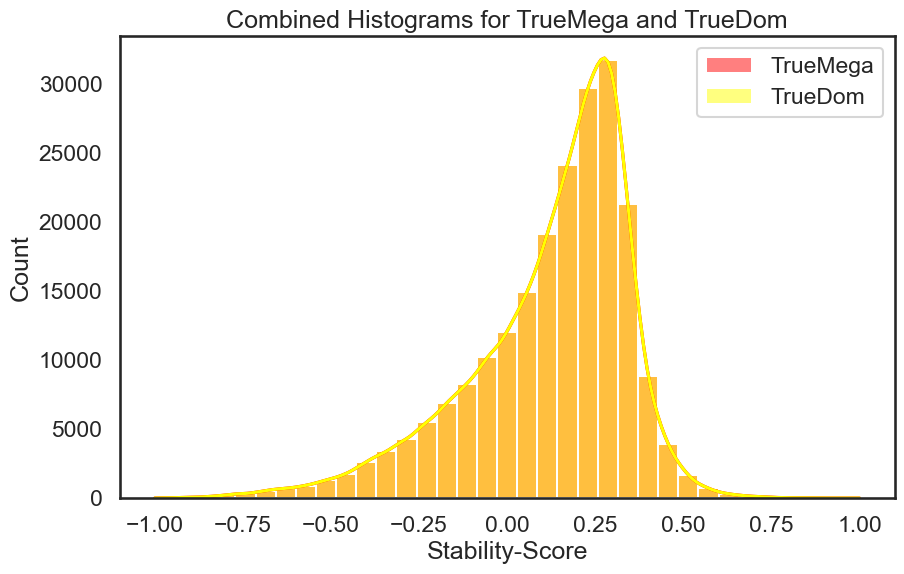

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(predictDataFiltered['y_true_mega'], bins=35, color='red', label='TrueMega', kde=True)
sns.histplot(predictDataFiltered['y_true_dom'], bins=35, color='yellow', label='TrueDom', kde=True)

plt.xlabel("Stability-Score")
plt.legend()
plt.title("Combined Histograms for TrueMega and TrueDom")
save_path = os.path.join(plots_dir, "HistogramTrueOverlay.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

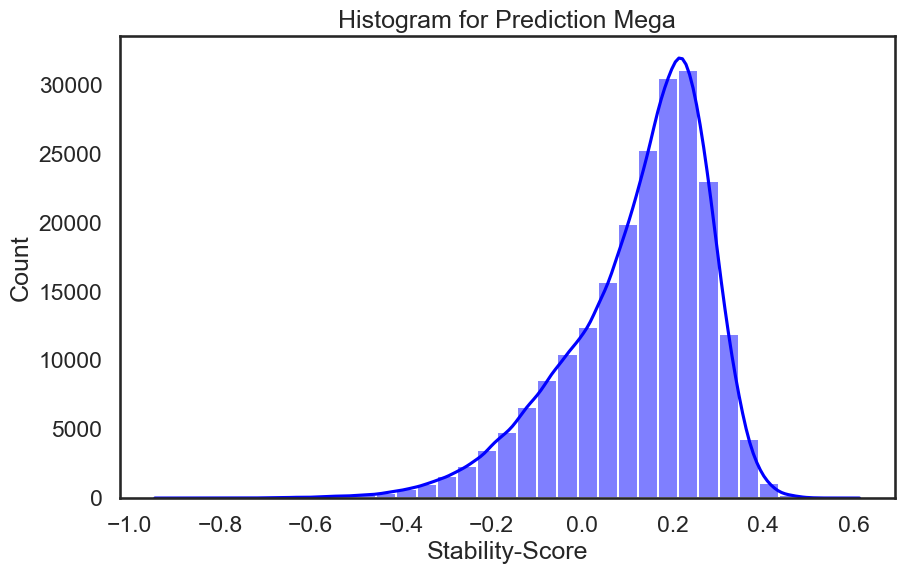

In [82]:
# Plotting histogram for 'prediction_mega'
plt.figure(figsize=(10, 6))
sns.histplot(predictDataFiltered['prediction_mega'], bins=35, color='blue', kde=True)
plt.xlabel("Stability-Score")
plt.title("Histogram for Prediction Mega")
save_path = os.path.join(plots_dir, "MegaPredictHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')


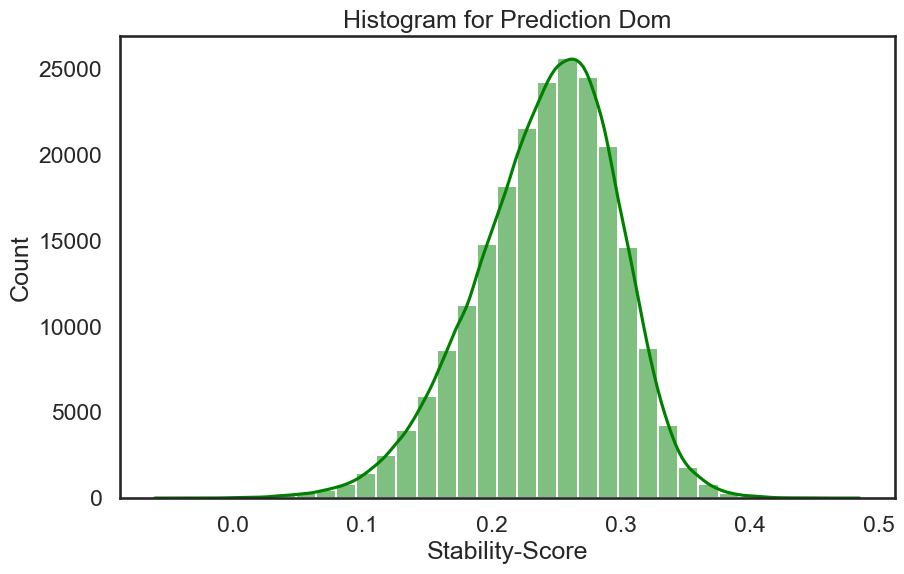

In [83]:
# Plotting histogram for 'prediction_dom'
plt.figure(figsize=(10, 6))
sns.histplot(predictDataFiltered['prediction_dom'], bins=35, color='green', kde=True)
plt.xlabel("Stability-Score")
plt.title("Histogram for Prediction Dom")
save_path = os.path.join(plots_dir, "DomainomePredictHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [ ]:
sns.histplot(predictDataFiltered, x="ddG_ML", bins=35)
plt.xlabel("Stability-Score")
# Define the full path for the plot file
save_path = os.path.join(plots_dir, "MegascaleStabilityScoreHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [66]:
#Grouping Dataset and calculating mean of all existing mutations for Domainome

groupedDataDomainome = dataDomainomeFiltered.groupby('mutation')['normalized_fitness'].mean().reset_index()

groupedDataDomainome['wt_aa'] = groupedDataDomainome['mutation'].str[0]
groupedDataDomainome['mut_aa'] = groupedDataDomainome['mutation'].str[1]
print(groupedDataDomainome)

    mutation  normalized_fitness wt_aa mut_aa
0         AC           -0.182701     A      C
1         AD           -0.276117     A      D
2         AE           -0.183584     A      E
3         AF           -0.348481     A      F
4         AG           -0.200689     A      G
..       ...                 ...   ...    ...
375       YR           -0.276621     Y      R
376       YS           -0.261555     Y      S
377       YT           -0.272153     Y      T
378       YV           -0.271224     Y      V
379       YW           -0.195036     Y      W

[380 rows x 4 columns]


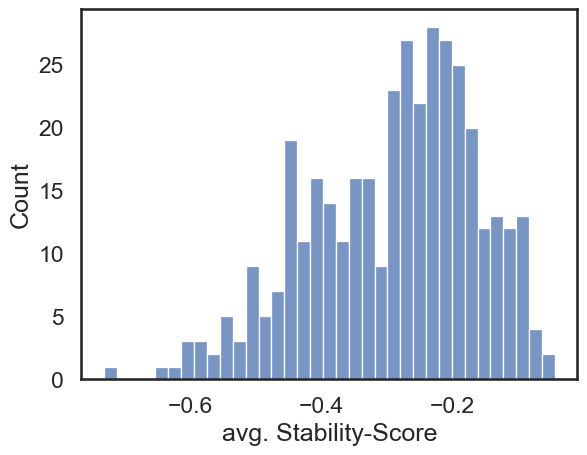

In [67]:
#avg. normalized fitness over the dataset Domainome 
sns.histplot(groupedDataDomainome, x="normalized_fitness", bins= 35)
plt.xlabel("avg. Stability-Score")
save_path = os.path.join(plots_dir, "avgDomainomeStabilityScoreHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [145]:
#Grouping Dataset and calculating mean of all existing mutations for Megascale
groupedDataMegascale = dataMegascale.groupby('mut_type')['ddG_ML'].mean().reset_index()
groupedDataMegascale = dataMegascale.groupby('mut_type')['ddG_ML'].mean().reset_index()
groupedDataMegascale = groupedDataMegascale[groupedDataMegascale['mut_type'] != 'wt']
groupedDataMegascale['wt_aa'] = groupedDataMegascale['mut_type'].str[0]
groupedDataMegascale['mut_aa'] = groupedDataMegascale['mut_type'].str[-1]
print(groupedDataMegascale)

      mut_type    ddG_ML wt_aa mut_aa
0         A10C -0.412013     A      C
1         A10D -1.440647     A      D
2         A10E -1.098026     A      E
3         A10F -0.732216     A      F
4         A10G -1.125067     A      G
...        ...       ...   ...    ...
23742      Y9R -0.775085     Y      R
23743      Y9S -1.513856     Y      S
23744      Y9T -1.851470     Y      T
23745      Y9V -1.289476     Y      V
23746      Y9W -0.466410     Y      W

[23747 rows x 4 columns]


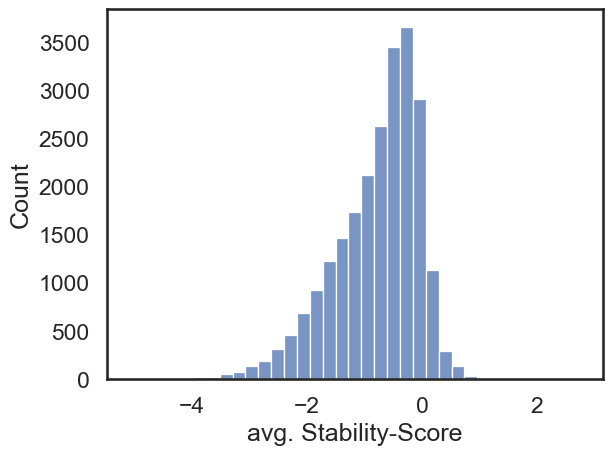

In [69]:
#avg. normalized fitness over the dataset Megascale 
sns.histplot(groupedDataMegascale, x="ddG_ML", bins= 35)
plt.xlabel("avg. Stability-Score")
save_path = os.path.join(plots_dir, "avgMegascaleStabilityScoreHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

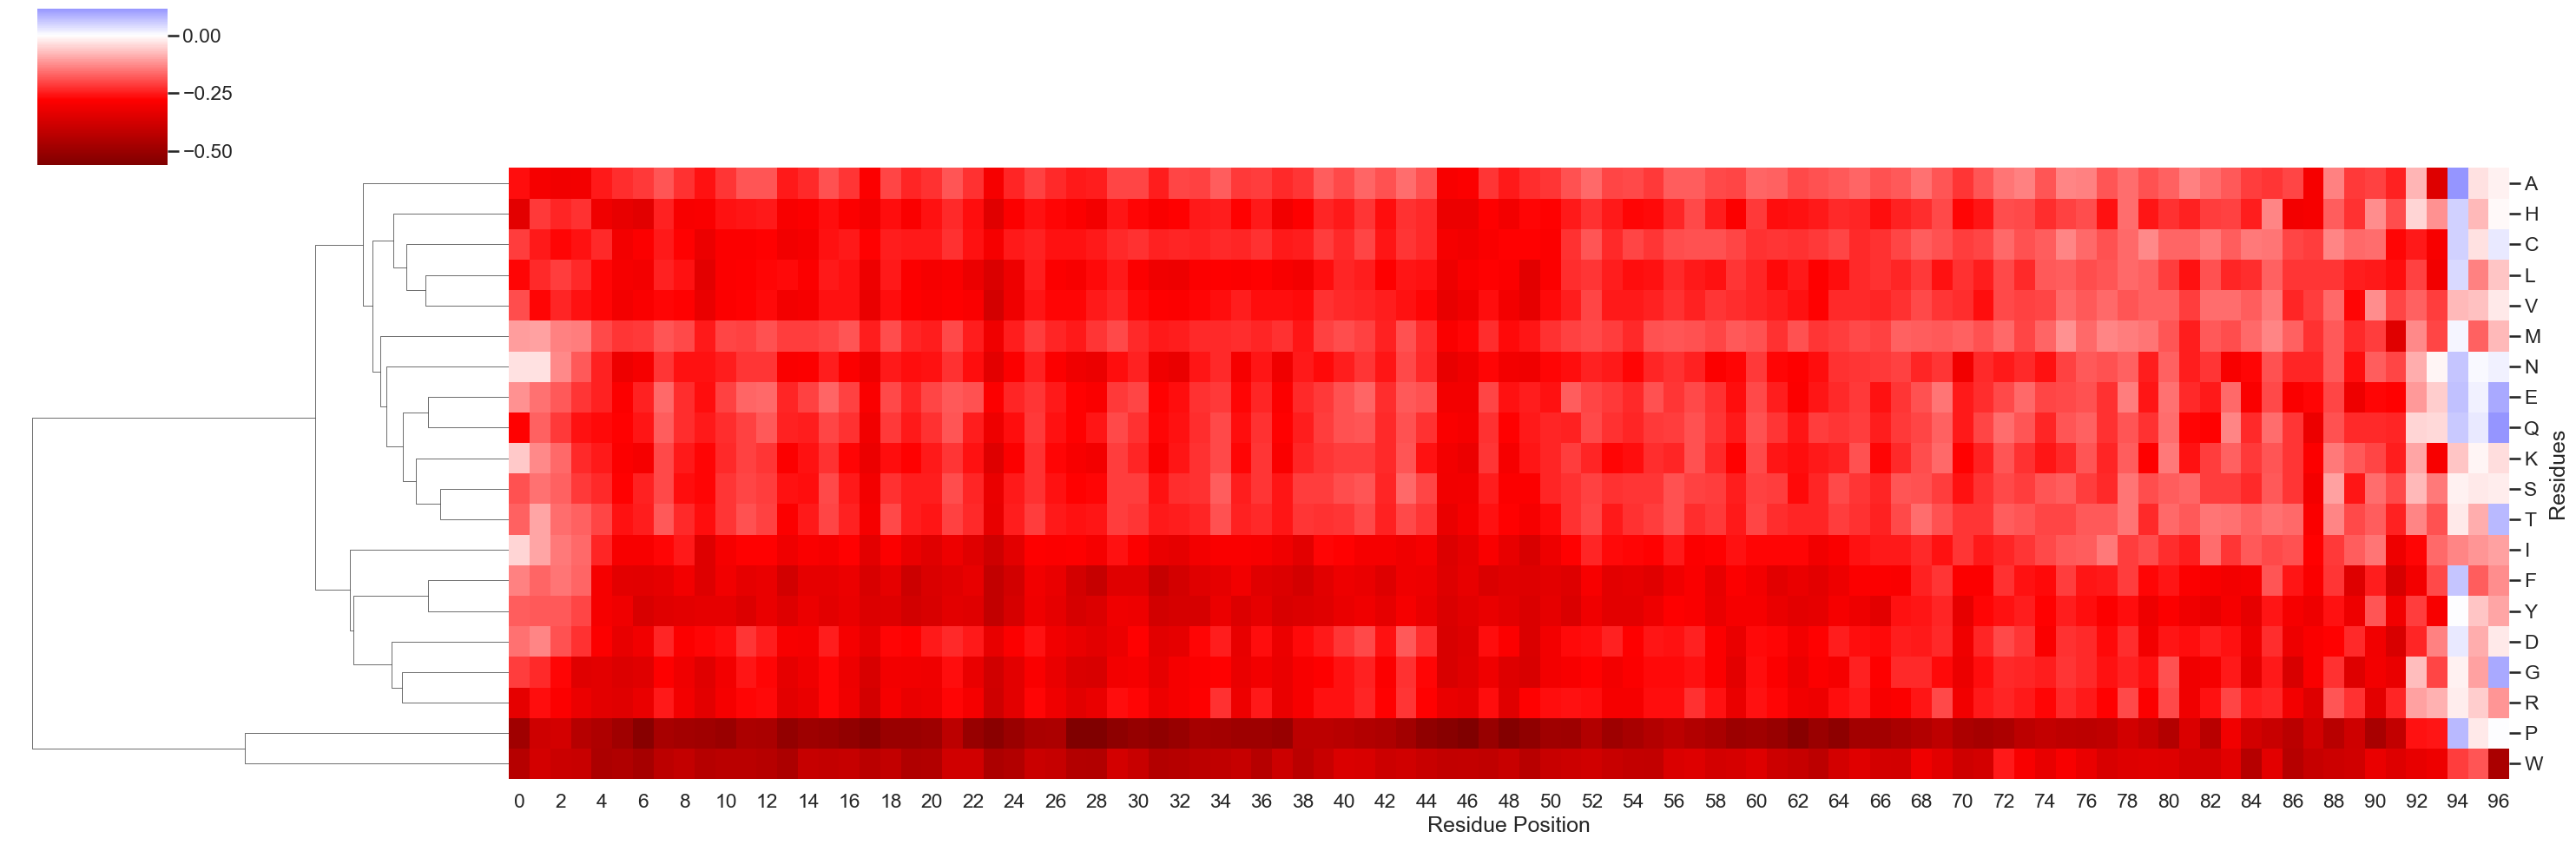

In [158]:
#avg. ddD der mutation per position 
#dataFiltered
groupedPosition=dataDomainomeFiltered.groupby(["position_abs", "mut_aa"])["normalized_fitness"].mean().reset_index()
pivot_table = groupedPosition.pivot(index='mut_aa', columns='position_abs', values='normalized_fitness')
pivot_table = pivot_table.fillna(0)
pivot_table.columns = pivot_table.columns.astype(int)
g = sns.clustermap(pivot_table, cbar=True, center=0, cmap="seismic_r", col_cluster=False, figsize=(30,10))
g.ax_heatmap.set_xlabel("Residue Position")  # Replace "New X-axis Label" with your label
g.ax_heatmap.set_ylabel("Residues") 
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
save_path = os.path.join(plots_dir, "avgDomainomeStabilityPerPosition.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [28]:

dataMegascale['position_abs'] = dataMegascale['mut_type'].copy()
dataMegascale['mutation'] = dataMegascale['mut_type'].str[0] + dataMegascale['mut_type'].str[-1]
dataMegascale['position_abs'] = dataMegascale['position_abs'].str[1:-1]
dataMegascaleFiltered = dataMegascale[dataMegascale['mut_type'] != 'wt']
dataMegascaleFiltered.loc[:, 'wt_aa'] = dataMegascaleFiltered['mutation'].str[0]
dataMegascaleFiltered.loc[:, 'mut_aa'] = dataMegascaleFiltered['mutation'].str[1]
dataMegascaleFiltered

C:\Users\philipp.gessner\AppData\Local\Temp\ipykernel_28356\2892236131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMegascaleFiltered.loc[:, 'wt_aa'] = dataMegascaleFiltered['mutation'].str[0]
C:\Users\philipp.gessner\AppData\Local\Temp\ipykernel_28356\2892236131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMegascaleFiltered.loc[:, 'mut_aa'] = dataMegascaleFiltered['mutation'].str[1]


,Unnamed: 0,name,ddG_ML,mut_type,WT_name,aa_seq,wt_seq,position_abs,mutation,wt_aa,mut_aa
5,5,r10_437_TrROS_Hall.pdb_E1Q,0.294920,E1Q,r10_437_TrROS_Hall.pdb,QPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,EQ,E,Q
6,6,r10_437_TrROS_Hall.pdb_E1N,0.356107,E1N,r10_437_TrROS_Hall.pdb,NPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,EN,E,N
7,7,r10_437_TrROS_Hall.pdb_E1H,0.264306,E1H,r10_437_TrROS_Hall.pdb,HPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,EH,E,H
8,8,r10_437_TrROS_Hall.pdb_E1D,0.174492,E1D,r10_437_TrROS_Hall.pdb,DPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,ED,E,D
9,9,r10_437_TrROS_Hall.pdb_E1R,0.531557,E1R,r10_437_TrROS_Hall.pdb,RPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,ER,E,R
...,...,...,...,...,...,...,...,...,...,...,...
216914,216914,HEEH_rd3_0055.pdb_L43W,0.143385,L43W,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQW,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LW,L,W
216915,216915,HEEH_rd3_0055.pdb_L43Y,0.059886,L43Y,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQY,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LY,L,Y
216916,216916,HEEH_rd3_0055.pdb_L43F,0.009488,L43F,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQF,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LF,L,F
216917,216917,HEEH_rd3_0055.pdb_L43P,-0.539100,L43P,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQP,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LP,L,P


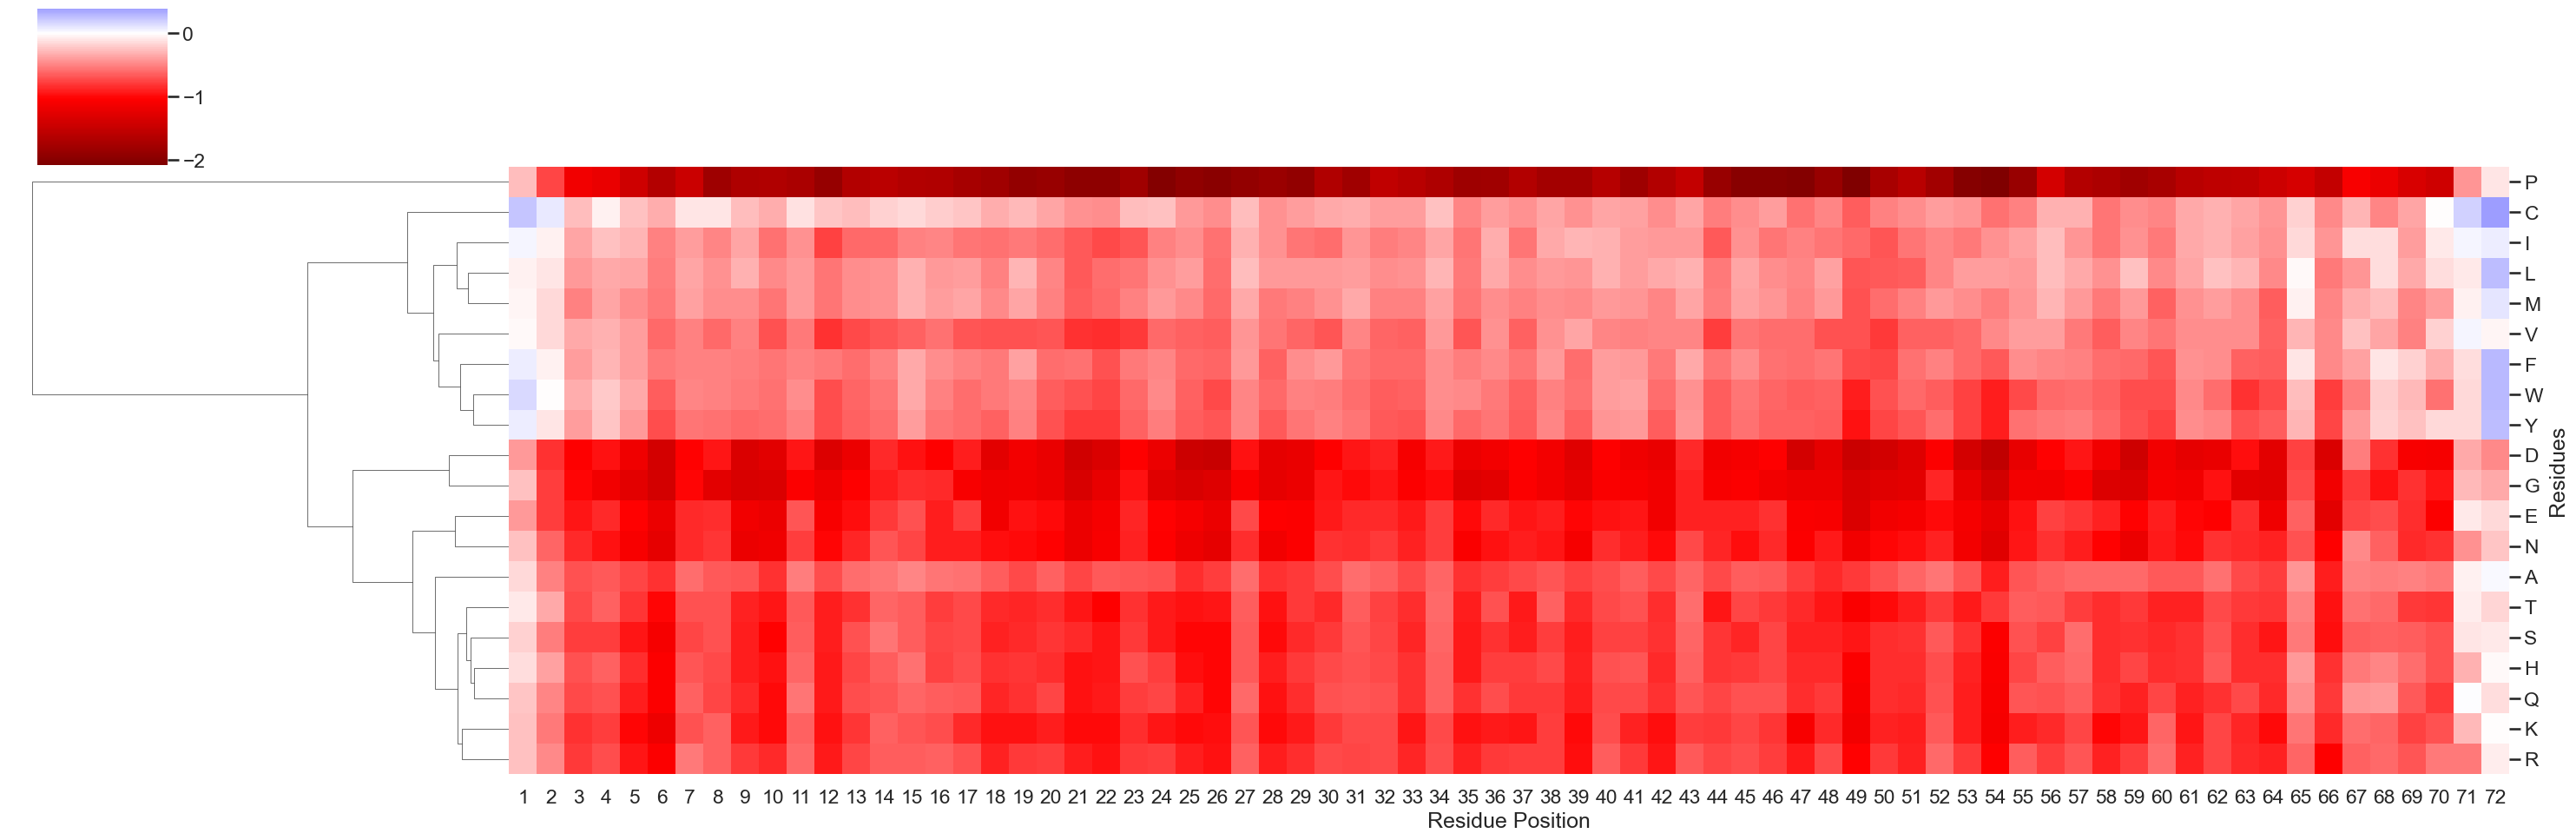

In [29]:
#avg. ddD der mutation per position 
#dataFiltered
groupedPosition=dataMegascaleFiltered.groupby(["position_abs", "mut_aa"])["ddG_ML"].mean().reset_index()
pivot_table = groupedPosition.pivot(index='mut_aa', columns='position_abs', values='ddG_ML')
pivot_table = pivot_table.fillna(0)
pivot_table.columns = pivot_table.columns.astype(int)
pivot_table = pivot_table.sort_index(axis=1)
g = sns.clustermap(pivot_table, cbar=True, center=0, cmap="seismic_r", col_cluster=False, figsize=(30,10))
g.ax_heatmap.set_xlabel("Residue Position")  # Replace "New X-axis Label" with your label
g.ax_heatmap.set_ylabel("Residues") 
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
save_path = os.path.join(plots_dir, "avgMegascaleStabilityPerPosition.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [30]:
dataMegascaleFiltered

,Unnamed: 0,name,ddG_ML,mut_type,WT_name,aa_seq,wt_seq,position_abs,mutation,wt_aa,mut_aa
5,5,r10_437_TrROS_Hall.pdb_E1Q,0.294920,E1Q,r10_437_TrROS_Hall.pdb,QPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,EQ,E,Q
6,6,r10_437_TrROS_Hall.pdb_E1N,0.356107,E1N,r10_437_TrROS_Hall.pdb,NPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,EN,E,N
7,7,r10_437_TrROS_Hall.pdb_E1H,0.264306,E1H,r10_437_TrROS_Hall.pdb,HPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,EH,E,H
8,8,r10_437_TrROS_Hall.pdb_E1D,0.174492,E1D,r10_437_TrROS_Hall.pdb,DPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,ED,E,D
9,9,r10_437_TrROS_Hall.pdb_E1R,0.531557,E1R,r10_437_TrROS_Hall.pdb,RPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,EPELVFKVRVRTKDGRELEIEVSAEDLEKLLEALPDIEEVEIEEVEP,1,ER,E,R
...,...,...,...,...,...,...,...,...,...,...,...
216914,216914,HEEH_rd3_0055.pdb_L43W,0.143385,L43W,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQW,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LW,L,W
216915,216915,HEEH_rd3_0055.pdb_L43Y,0.059886,L43Y,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQY,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LY,L,Y
216916,216916,HEEH_rd3_0055.pdb_L43F,0.009488,L43F,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQF,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LF,L,F
216917,216917,HEEH_rd3_0055.pdb_L43P,-0.539100,L43P,HEEH_rd3_0055.pdb,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQP,TIEDAIKKLLKLAQKGQPYTFGDFTVTSEEEAKKLAKWLKKQL,43,LP,L,P


In [24]:
predictDataFiltered

,ddG_ML,mut_type,mutation_pos,mutation_to,prediction_mega,y_true_mega,prediction_dom,y_true_dom,mutation,wt_aa,mut_aa
0,0.274618,S1A,0,0,0.244867,0.274618,0.268696,0.274618,SA,S,A
1,0.391416,S1C,0,1,0.295403,0.391416,0.253038,0.391416,SC,S,C
2,0.329590,S1D,0,2,0.223768,0.329590,0.324191,0.329590,SD,S,D
3,0.269378,S1E,0,3,0.187730,0.269378,0.344384,0.269378,SE,S,E
4,0.456613,S1F,0,4,0.238422,0.456613,0.258794,0.456613,SF,S,F
...,...,...,...,...,...,...,...,...,...,...,...
215726,0.341185,V48N,47,11,0.090213,0.341185,0.237484,0.341185,VN,V,N
215727,0.360601,V48P,47,12,0.098666,0.360601,0.261444,0.360601,VP,V,P
215728,0.341126,V48Q,47,13,0.117495,0.341126,0.264686,0.341126,VQ,V,Q
215729,0.330819,V48S,47,15,0.117521,0.330819,0.276653,0.330819,VS,V,S


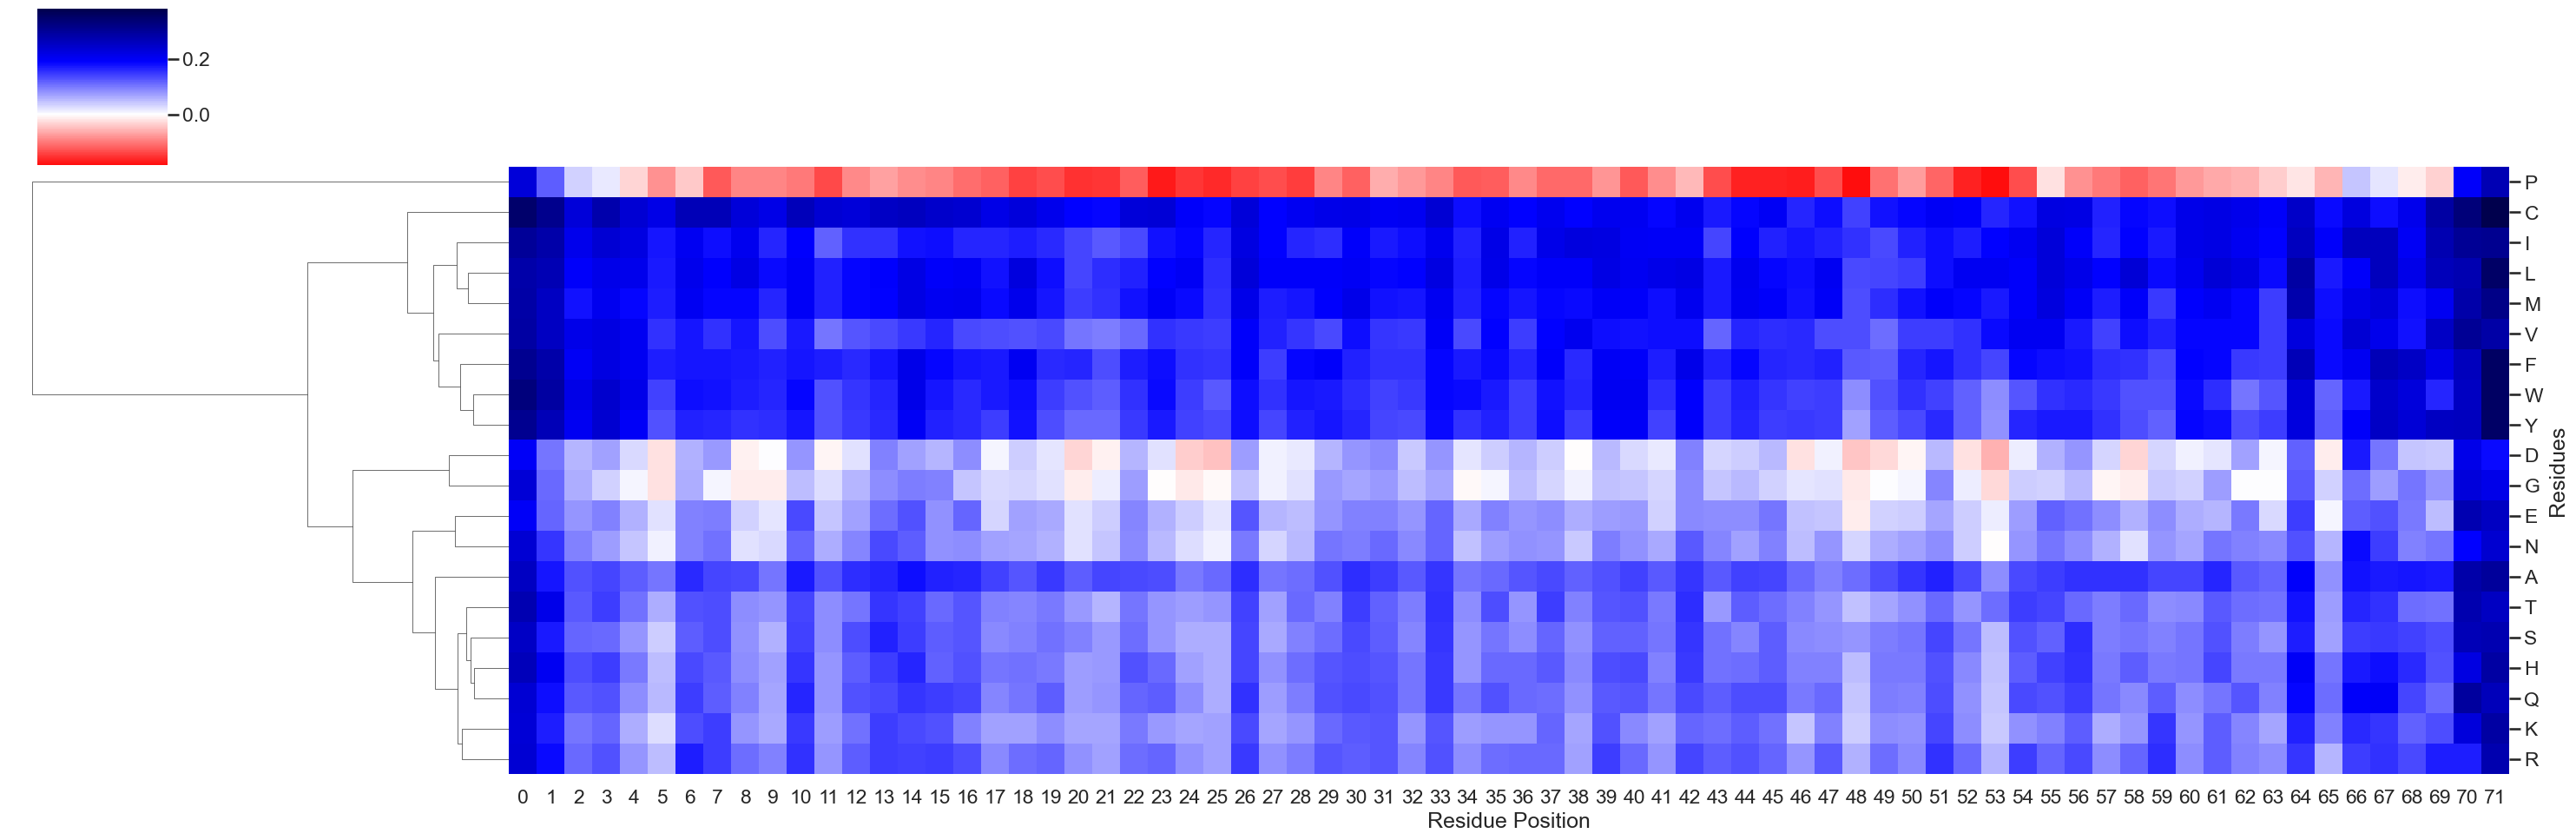

In [31]:
#avg. ddD der mutation per position 
#dataFiltered
predictDataFiltered = predictDataFiltered.rename(columns={'mutation_pos': 'position_abs'})
groupedPosition=predictDataFiltered.groupby(["position_abs", "mut_aa"])["ddG_ML"].mean().reset_index()
pivot_table = groupedPosition.pivot(index='mut_aa', columns='position_abs', values='ddG_ML')
pivot_table = pivot_table.fillna(0)
pivot_table.columns = pivot_table.columns.astype(int)
pivot_table = pivot_table.sort_index(axis=1)
g = sns.clustermap(pivot_table, cbar=True, center=0, cmap="seismic_r", col_cluster=False, figsize=(30,10))
g.ax_heatmap.set_xlabel("Residue Position")  # Replace "New X-axis Label" with your label
g.ax_heatmap.set_ylabel("Residues") 
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
save_path = os.path.join(plots_dir, "avgTruePredictPerPosition.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

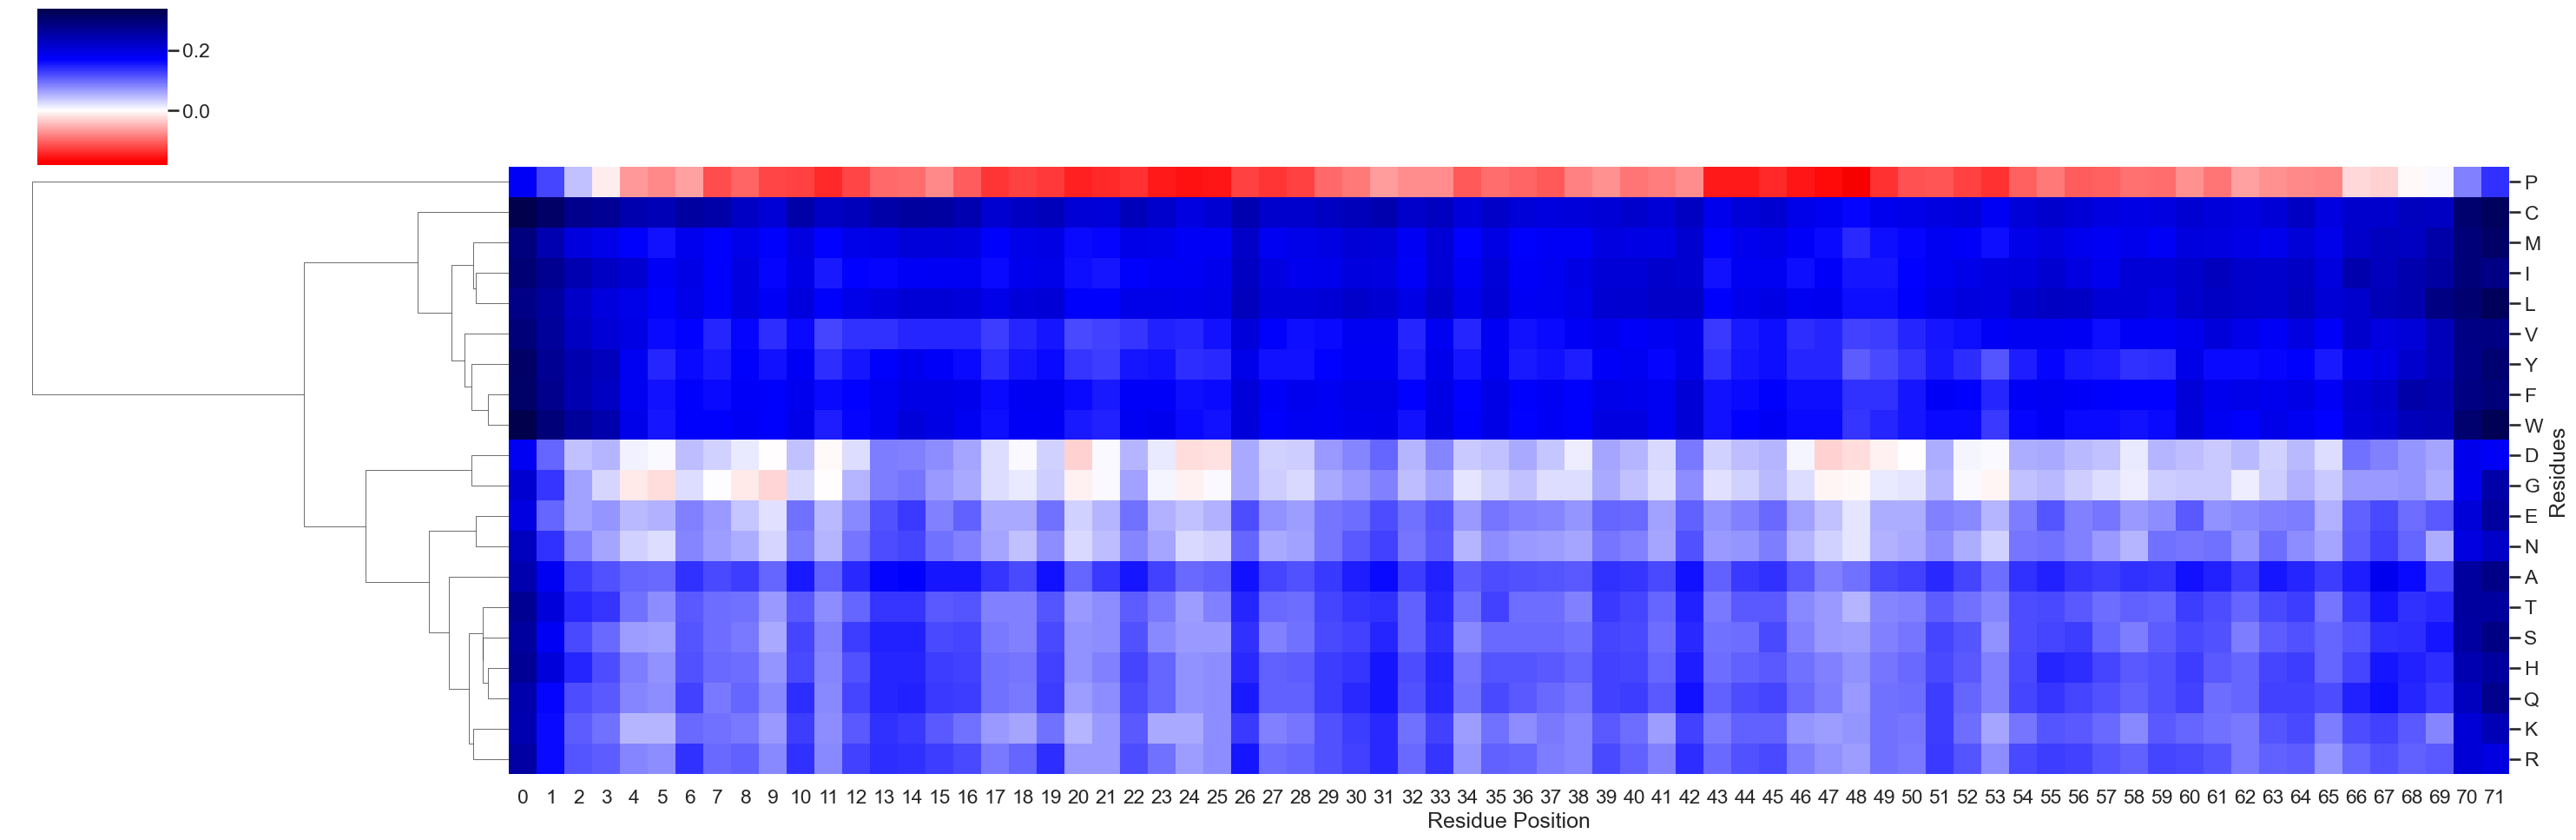

In [33]:
#avg. ddD der mutation per position 
#dataFiltered
predictDataFiltered = predictDataFiltered.rename(columns={'mutation_pos': 'position_abs'})
groupedPosition=predictDataFiltered.groupby(["position_abs", "mut_aa"])["prediction_mega"].mean().reset_index()
pivot_table = groupedPosition.pivot(index='mut_aa', columns='position_abs', values='prediction_mega')
pivot_table = pivot_table.fillna(0)
pivot_table.columns = pivot_table.columns.astype(int)
pivot_table = pivot_table.sort_index(axis=1)
g = sns.clustermap(pivot_table, cbar=True, center=0, cmap="seismic_r", col_cluster=False, figsize=(30,10))
g.ax_heatmap.set_xlabel("Residue Position")  # Replace "New X-axis Label" with your label
g.ax_heatmap.set_ylabel("Residues") 
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
save_path = os.path.join(plots_dir, "avgMegaPredictPerPosition.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

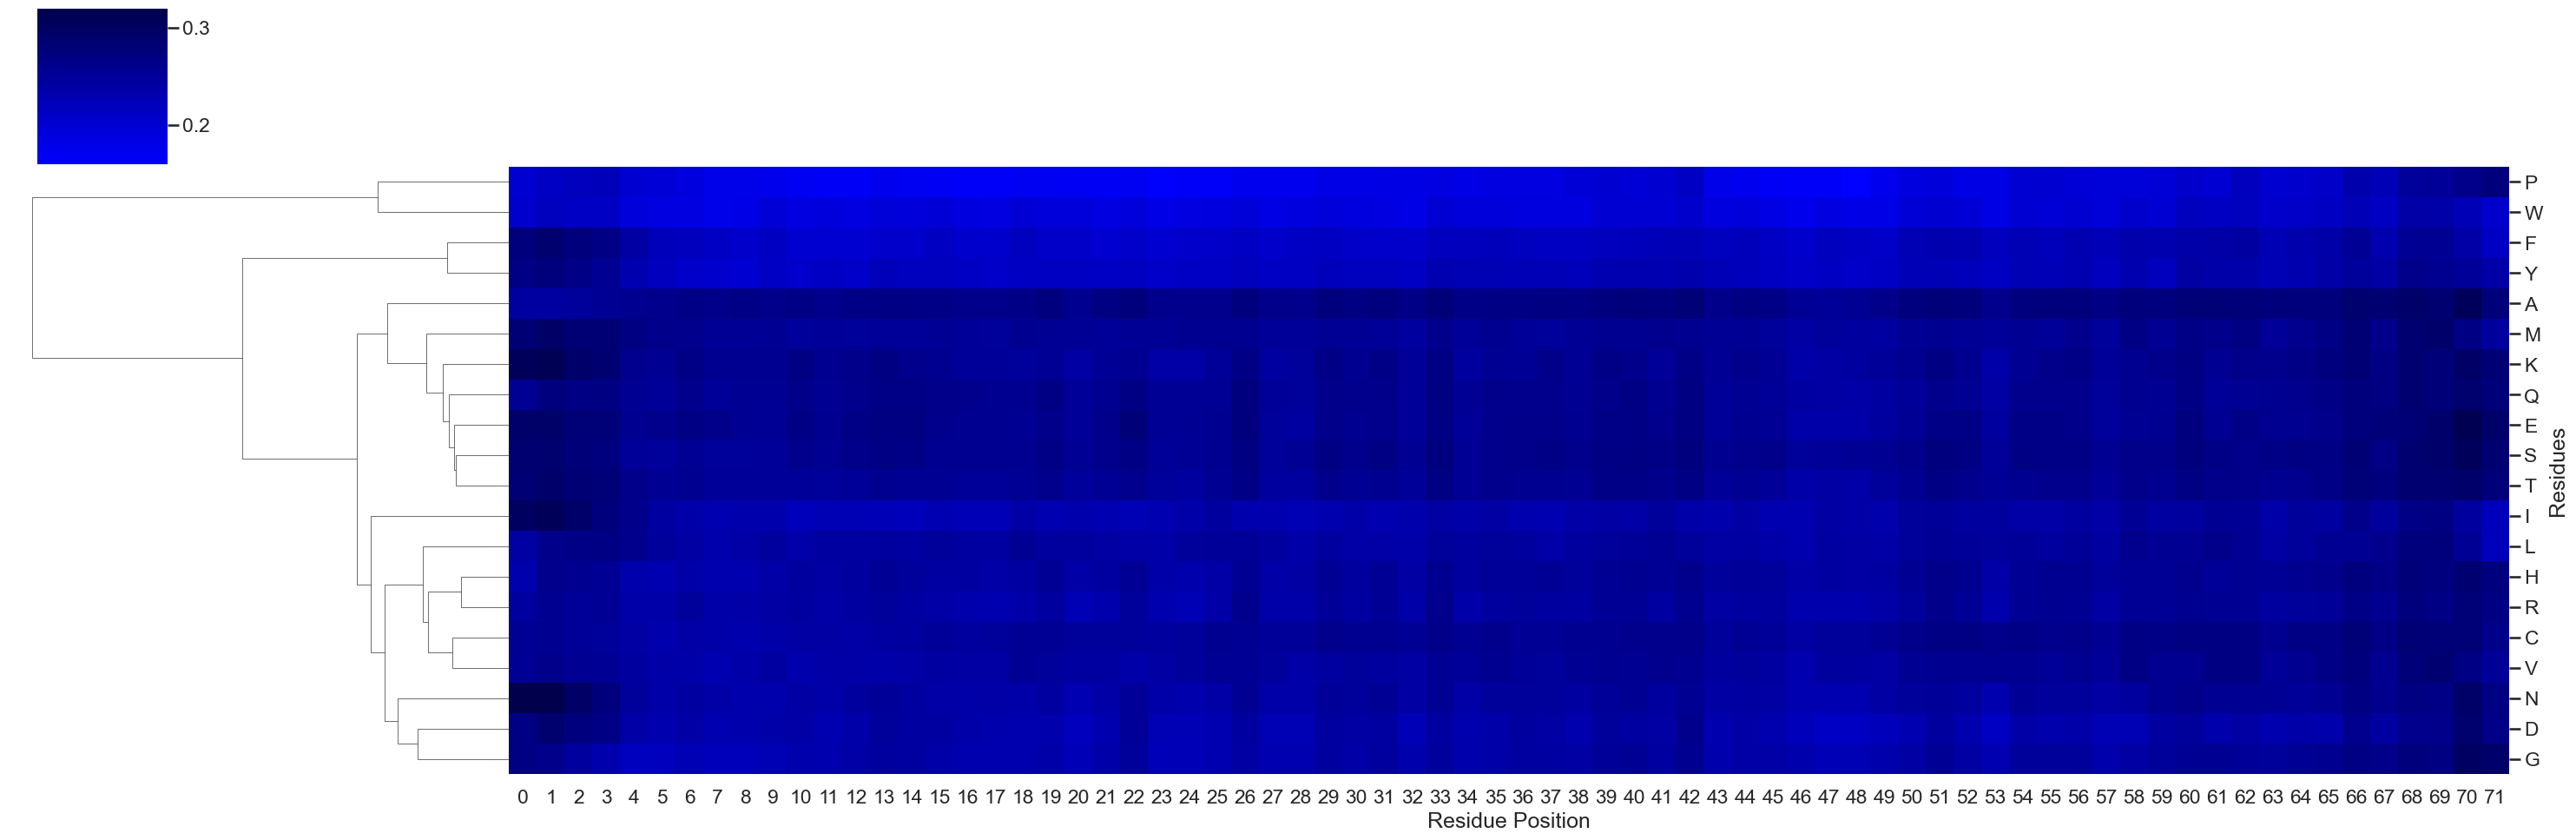

In [34]:
#avg. ddD der mutation per position 
#dataFiltered
predictDataFiltered = predictDataFiltered.rename(columns={'mutation_pos': 'position_abs'})
groupedPosition=predictDataFiltered.groupby(["position_abs", "mut_aa"])["prediction_dom"].mean().reset_index()
pivot_table = groupedPosition.pivot(index='mut_aa', columns='position_abs', values='prediction_dom')
pivot_table = pivot_table.fillna(0)
pivot_table.columns = pivot_table.columns.astype(int)
pivot_table = pivot_table.sort_index(axis=1)
g = sns.clustermap(pivot_table, cbar=True, center=0, cmap="seismic_r", col_cluster=False, figsize=(30,10))
g.ax_heatmap.set_xlabel("Residue Position")  # Replace "New X-axis Label" with your label
g.ax_heatmap.set_ylabel("Residues") 
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
save_path = os.path.join(plots_dir, "avgDomainomePredictPerPosition.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [146]:
##########
pivot_dfDomainome = groupedDataDomainome.pivot(index='mut_aa', columns='wt_aa', values='normalized_fitness')
# Aggregate duplicates by taking the mean of 'ddG_ML'
groupedDataMegascale= groupedDataMegascale.groupby(['mut_aa', 'wt_aa']).agg({'ddG_ML': 'mean'}).reset_index()
pivot_dfMegascale = groupedDataMegascale.pivot(index='mut_aa', columns='wt_aa', values='ddG_ML')
# Plot the heatmap
#plt.figure(figsize=(16, 10))
#sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
#plt.title('Heatmap of Normalized Fitness')
#plt.xlabel('wt_aa')
#plt.ylabel('mut_aa')
#plt.savefig('heatmap_normalized_fitness.png', format='png')
#plt.show()
###########

In [115]:
#pivot_df

wt_aa,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
mut_aa,,,,,,,,,,,,,,,,,,,,
A,NaN,-0.525818,-0.199197,-0.172879,-0.393234,-0.268830,-0.211580,-0.331325,-0.125705,-0.327396,-0.187362,-0.150434,-0.200159,-0.093810,-0.121543,-0.093820,-0.169183,-0.224511,-0.418678,-0.253680
C,-0.182701,NaN,-0.266732,-0.260221,-0.383445,-0.346395,-0.205779,-0.277362,-0.224490,-0.293562,-0.223566,-0.209853,-0.297436,-0.206647,-0.206246,-0.170371,-0.189793,-0.195058,-0.429344,-0.249515
D,-0.276117,-0.474484,NaN,-0.144277,-0.477588,-0.242421,-0.230685,-0.456564,-0.207554,-0.444375,-0.297602,-0.082247,-0.238723,-0.146021,-0.225640,-0.093857,-0.183560,-0.407600,-0.460338,-0.344968
E,-0.183584,-0.494353,-0.106964,NaN,-0.424258,-0.257746,-0.172180,-0.386019,-0.110368,-0.387473,-0.221812,-0.085253,-0.190852,-0.054651,-0.121475,-0.079551,-0.145034,-0.337279,-0.440146,-0.298182
F,-0.348481,-0.608285,-0.375059,-0.343193,NaN,-0.441891,-0.347536,-0.308270,-0.298677,-0.276361,-0.228355,-0.328551,-0.362872,-0.300698,-0.274639,-0.298017,-0.313299,-0.327804,-0.224733,-0.102158
G,-0.200689,-0.547649,-0.236044,-0.257015,-0.497181,NaN,-0.258278,-0.487740,-0.226335,-0.456665,-0.331202,-0.150569,-0.264895,-0.202785,-0.221050,-0.125308,-0.245108,-0.425577,-0.504958,-0.360087
H,-0.272733,-0.497964,-0.222826,-0.228342,-0.388976,-0.297767,NaN,-0.402971,-0.182966,-0.402729,-0.283233,-0.154262,-0.275099,-0.155657,-0.165236,-0.165788,-0.221039,-0.371987,-0.390008,-0.183665
I,-0.281599,-0.582929,-0.373269,-0.291882,-0.327308,-0.507853,-0.355521,NaN,-0.240094,-0.164236,-0.165019,-0.329325,-0.317699,-0.221905,-0.227453,-0.279917,-0.257835,-0.096194,-0.406187,-0.277640
K,-0.221231,-0.549146,-0.220256,-0.176982,-0.446517,-0.272918,-0.196210,-0.396731,NaN,-0.381187,-0.241735,-0.125112,-0.203110,-0.079051,-0.043734,-0.118240,-0.174721,-0.353091,-0.414204,-0.254895


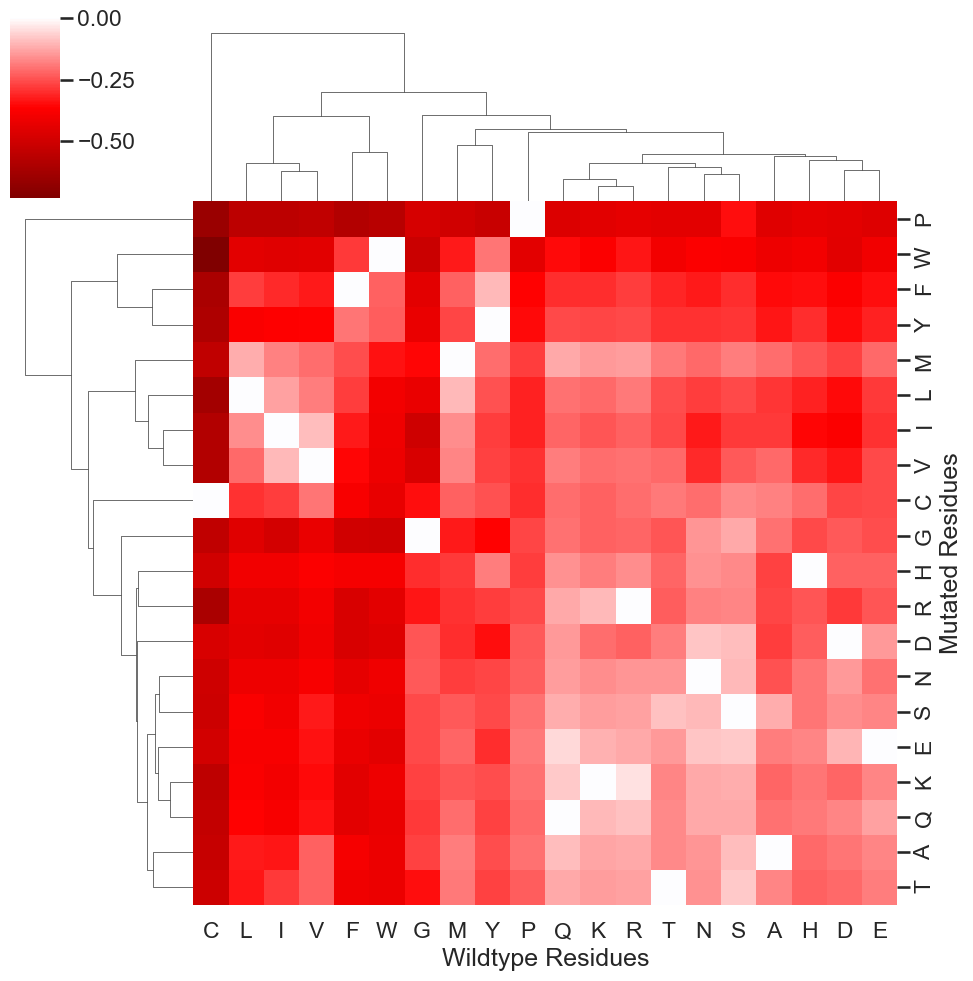

In [160]:
###Domainome Aminoacid vs Aminoacid Clustermap 

pivot_df_filledDomain = pivot_dfDomainome.fillna(0)
aa = sns.clustermap(pivot_df_filledDomain, annot=False, cmap='seismic_r', cbar=True, center=0, ) #,col_cluster=False)
aa.ax_heatmap.set_xlabel("Wildtype Residues")  # Replace "New X-axis Label" with your label
aa.ax_heatmap.set_ylabel("Mutated Residues")

#plt.title('Clustering of Normalized Fitness')
#plt.xlabel('wt_aa')
#plt.ylabel('mut_aa')
#plt.show()


save_path = os.path.join(plots_dir, "DomainomeAminoacidToAminoacidMutationComparison.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

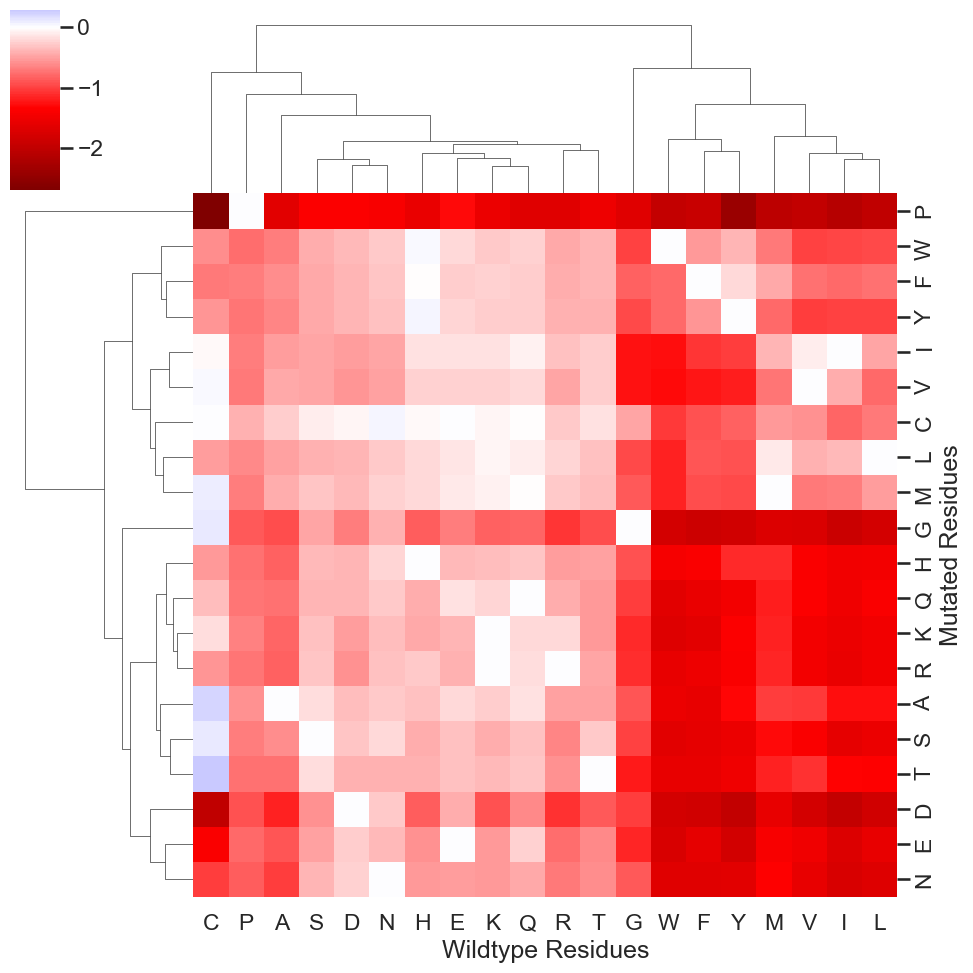

In [161]:
###Domainome Aminoacid vs Aminoacid Megascale 

pivot_df_filledMegascale = pivot_dfMegascale.fillna(0)
bb = sns.clustermap(pivot_df_filledMegascale, annot=False, cmap='seismic_r', cbar=True, center=0) #,col_cluster=False)
bb.ax_heatmap.set_xlabel("Wildtype Residues")  # Replace "New X-axis Label" with your label
bb.ax_heatmap.set_ylabel("Mutated Residues")

#plt.title('Clustering of Normalized Fitness')
#plt.xlabel('wt_aa')
#plt.ylabel('mut_aa')
#plt.show()


save_path = os.path.join(plots_dir, "MegascaleAminoacidToAminoacidMutationComparison.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [35]:
predictDataFiltered

,ddG_ML,mut_type,position_abs,mutation_to,prediction_mega,y_true_mega,prediction_dom,y_true_dom,mutation,wt_aa,mut_aa
0,0.274618,S1A,0,0,0.244867,0.274618,0.268696,0.274618,SA,S,A
1,0.391416,S1C,0,1,0.295403,0.391416,0.253038,0.391416,SC,S,C
2,0.329590,S1D,0,2,0.223768,0.329590,0.324191,0.329590,SD,S,D
3,0.269378,S1E,0,3,0.187730,0.269378,0.344384,0.269378,SE,S,E
4,0.456613,S1F,0,4,0.238422,0.456613,0.258794,0.456613,SF,S,F
...,...,...,...,...,...,...,...,...,...,...,...
215726,0.341185,V48N,47,11,0.090213,0.341185,0.237484,0.341185,VN,V,N
215727,0.360601,V48P,47,12,0.098666,0.360601,0.261444,0.360601,VP,V,P
215728,0.341126,V48Q,47,13,0.117495,0.341126,0.264686,0.341126,VQ,V,Q
215729,0.330819,V48S,47,15,0.117521,0.330819,0.276653,0.330819,VS,V,S


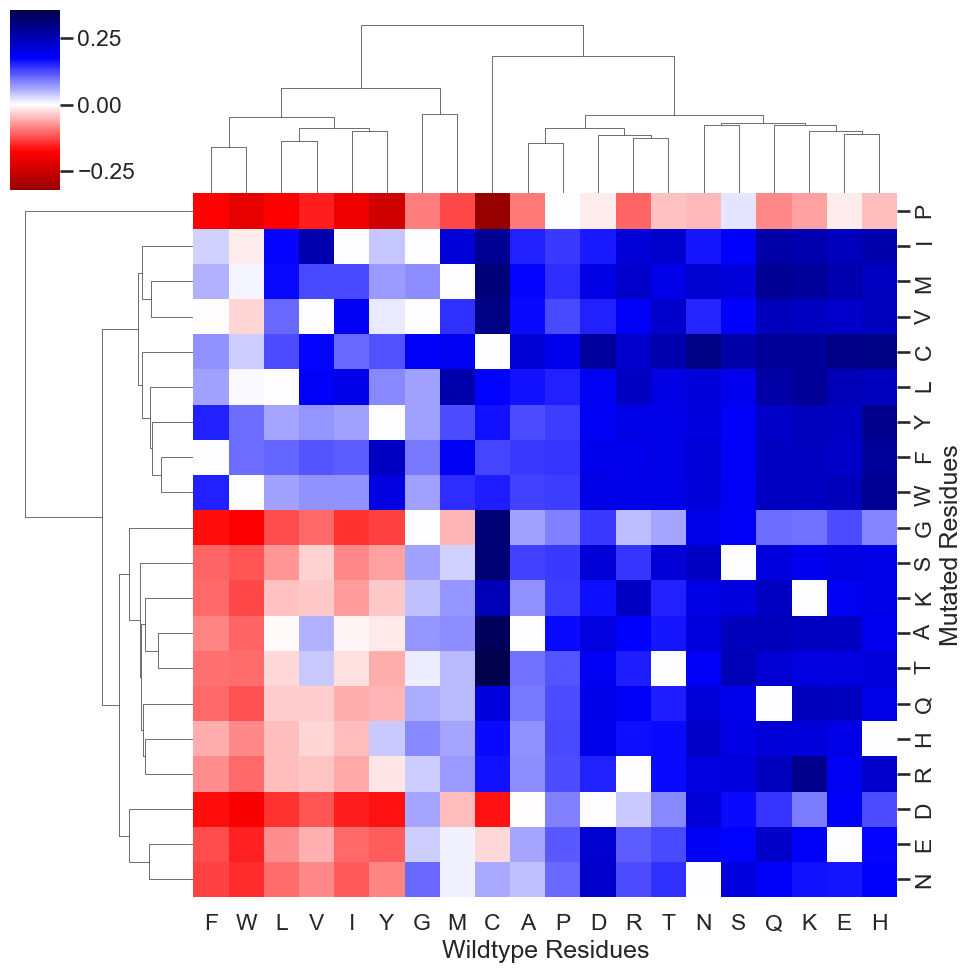

In [38]:
###Domainome Aminoacid vs Aminoacid Megascale Predicted
# Aggregate duplicates by taking the mean of 'ddG_ML'
AA_predictDataFiltered= predictDataFiltered.groupby(['mut_aa', 'wt_aa']).agg({'ddG_ML': 'mean'}).reset_index()
pivot_predictDataFiltered = AA_predictDataFiltered.pivot(index='mut_aa', columns='wt_aa', values='ddG_ML')
pivot_predictDataFiltered = pivot_predictDataFiltered.fillna(0)
bb = sns.clustermap(pivot_predictDataFiltered, annot=False, cmap='seismic_r', cbar=True, center=0) #,col_cluster=False)
bb.ax_heatmap.set_xlabel("Wildtype Residues")  # Replace "New X-axis Label" with your label
bb.ax_heatmap.set_ylabel("Mutated Residues")

#plt.title('Clustering of Normalized Fitness')
#plt.xlabel('wt_aa')
#plt.ylabel('mut_aa')
#plt.show()


save_path = os.path.join(plots_dir, "PredictedTrueAminoacidToAminoacidMutationComparison.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [42]:
predictDataFiltered

,ddG_ML,mut_type,mutation_pos,mutation_to,prediction_mega,y_true_mega,prediction_dom,y_true_dom,mutation,wt_aa,mut_aa
0,0.274618,S1A,0,0,0.244867,0.274618,0.268696,0.274618,SA,S,A
1,0.391416,S1C,0,1,0.295403,0.391416,0.253038,0.391416,SC,S,C
2,0.329590,S1D,0,2,0.223768,0.329590,0.324191,0.329590,SD,S,D
3,0.269378,S1E,0,3,0.187730,0.269378,0.344384,0.269378,SE,S,E
4,0.456613,S1F,0,4,0.238422,0.456613,0.258794,0.456613,SF,S,F
...,...,...,...,...,...,...,...,...,...,...,...
215726,0.341185,V48N,47,11,0.090213,0.341185,0.237484,0.341185,VN,V,N
215727,0.360601,V48P,47,12,0.098666,0.360601,0.261444,0.360601,VP,V,P
215728,0.341126,V48Q,47,13,0.117495,0.341126,0.264686,0.341126,VQ,V,Q
215729,0.330819,V48S,47,15,0.117521,0.330819,0.276653,0.330819,VS,V,S


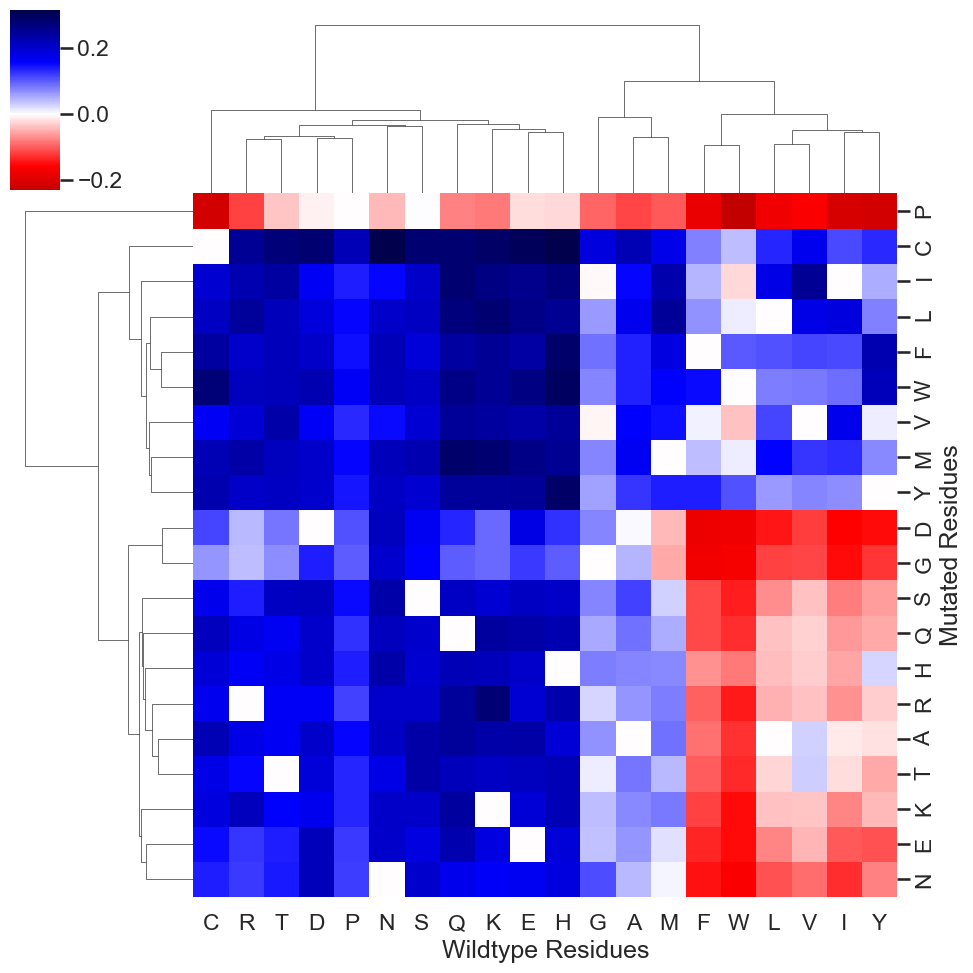

In [43]:
predictMegaFiltered= predictDataFiltered.groupby(['mut_aa', 'wt_aa']).agg({'prediction_mega': 'mean'}).reset_index()
pivot_predictDataFiltered = predictMegaFiltered.pivot(index='mut_aa', columns='wt_aa', values='prediction_mega')
pivot_predictDataFiltered = pivot_predictDataFiltered.fillna(0)
bb = sns.clustermap(pivot_predictDataFiltered, annot=False, cmap='seismic_r', cbar=True, center=0) #,col_cluster=False)
bb.ax_heatmap.set_xlabel("Wildtype Residues")  # Replace "New X-axis Label" with your label
bb.ax_heatmap.set_ylabel("Mutated Residues")

#plt.title('Clustering of Normalized Fitness')
#plt.xlabel('wt_aa')
#plt.ylabel('mut_aa')
#plt.show()


save_path = os.path.join(plots_dir, "PredictedMegaAminoacidToAminoacidMutationComparison.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [48]:
predictDomFiltered

,mut_aa,wt_aa,prediction_dom
0,A,C,0.298081
1,A,D,0.266146
2,A,E,0.274554
3,A,F,0.207441
4,A,G,0.239272
...,...,...,...
375,Y,R,0.237271
376,Y,S,0.230347
377,Y,T,0.228998
378,Y,V,0.200600


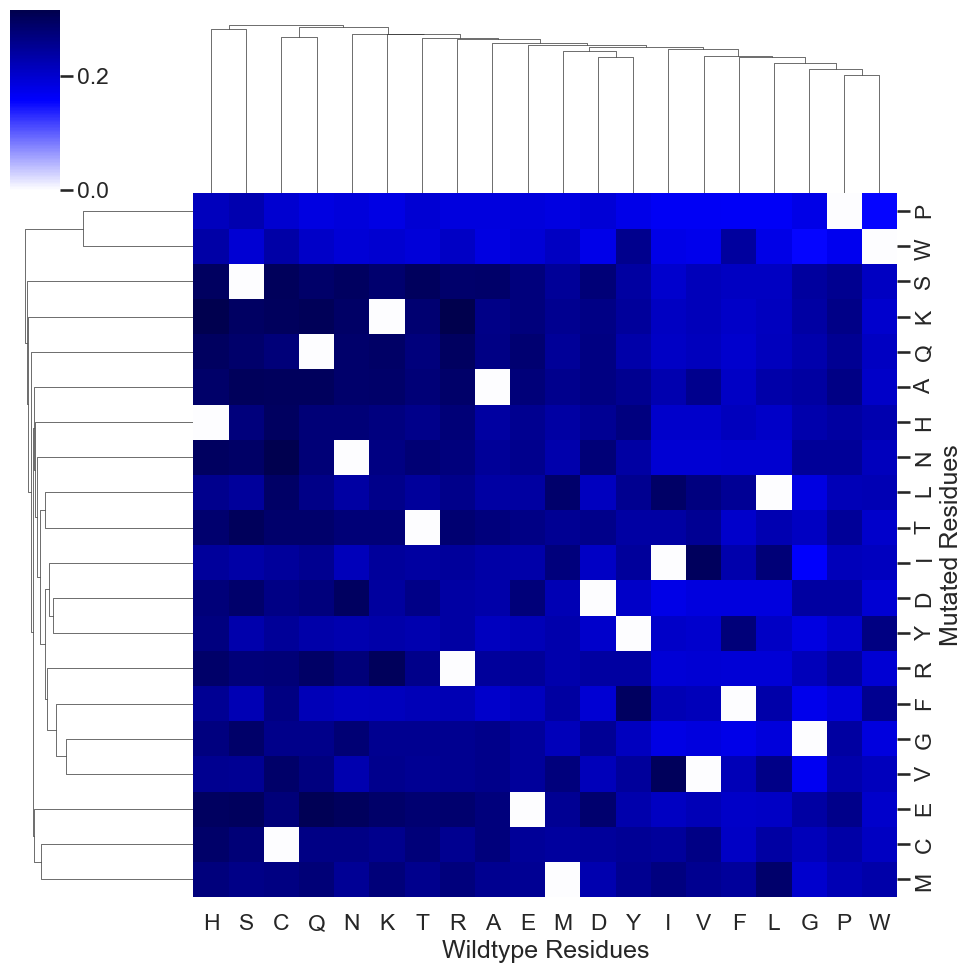

In [49]:
predictDomFiltered= predictDataFiltered.groupby(['mut_aa', 'wt_aa']).agg({'prediction_dom': 'mean'}).reset_index()
pivot_predictDataFiltered = predictDomFiltered.pivot(index='mut_aa', columns='wt_aa', values='prediction_dom')
pivot_predictDataFiltered = pivot_predictDataFiltered.fillna(0)
bb = sns.clustermap(pivot_predictDataFiltered, annot=False, cmap='seismic_r', cbar=True, center=0) #,col_cluster=False)
bb.ax_heatmap.set_xlabel("Wildtype Residues")  # Replace "New X-axis Label" with your label
bb.ax_heatmap.set_ylabel("Mutated Residues")

#plt.title('Clustering of Normalized Fitness')
#plt.xlabel('wt_aa')
#plt.ylabel('mut_aa')
#plt.show()


save_path = os.path.join(plots_dir, "PredictedDomAminoacidToAminoacidMutationComparison.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [84]:
df = predictDataFiltered
df = predictDataFiltered.rename(columns={
    'ddG_ML': 'true_values',
    'prediction_mega': 'predicted_values'
})
df

,true_values,mut_type,mutation_pos,mutation_to,predicted_values,y_true_mega,prediction_dom,y_true_dom,mutation,wt_aa,mut_aa
0,0.274618,S1A,0,0,0.244867,0.274618,0.268696,0.274618,SA,S,A
1,0.391416,S1C,0,1,0.295403,0.391416,0.253038,0.391416,SC,S,C
2,0.329590,S1D,0,2,0.223768,0.329590,0.324191,0.329590,SD,S,D
3,0.269378,S1E,0,3,0.187730,0.269378,0.344384,0.269378,SE,S,E
4,0.456613,S1F,0,4,0.238422,0.456613,0.258794,0.456613,SF,S,F
...,...,...,...,...,...,...,...,...,...,...,...
215726,0.341185,V48N,47,11,0.090213,0.341185,0.237484,0.341185,VN,V,N
215727,0.360601,V48P,47,12,0.098666,0.360601,0.261444,0.360601,VP,V,P
215728,0.341126,V48Q,47,13,0.117495,0.341126,0.264686,0.341126,VQ,V,Q
215729,0.330819,V48S,47,15,0.117521,0.330819,0.276653,0.330819,VS,V,S


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute Comparative Statistics
correlation = df['true_values'].corr(df['predicted_values'])
mae = mean_absolute_error(df['true_values'], df['predicted_values'])
mse = mean_squared_error(df['true_values'], df['predicted_values'])
rmse = np.sqrt(mse)

print(f"Correlation: {correlation}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Correlation: 0.7048865382208058
Mean Absolute Error (MAE): 0.12185642561054333
Mean Squared Error (MSE): 0.02634977401837835
Root Mean Squared Error (RMSE): 0.16232613473614885


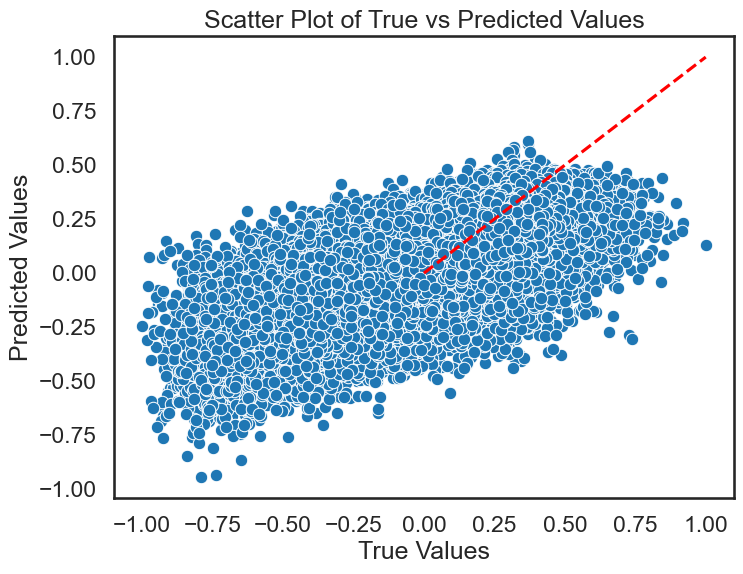

In [86]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='true_values', y='predicted_values', data=df)
plt.plot([0, max(df['true_values'])], [0, max(df['true_values'])], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')

save_path = os.path.join(plots_dir, "OverlayAnalysisMegaScatterplot.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

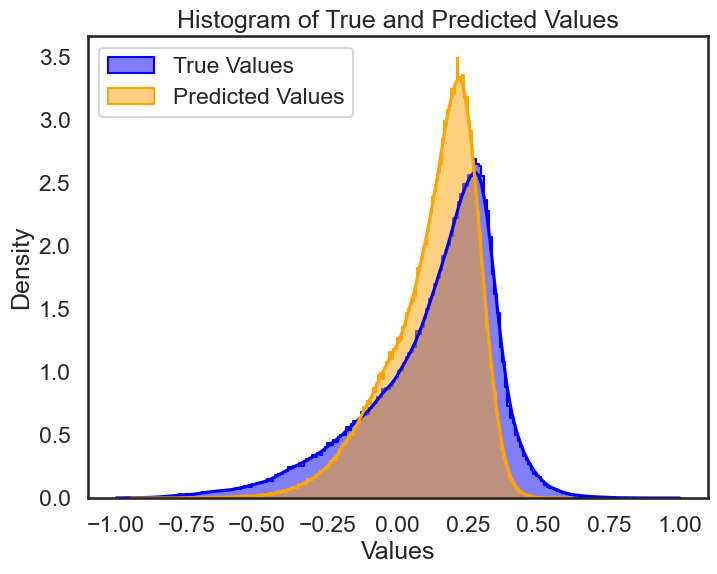

In [87]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['true_values'], color='blue', label='True Values', kde=True, element='step', stat="density")
sns.histplot(df['predicted_values'], color='orange', label='Predicted Values', kde=True, element='step', stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of True and Predicted Values')
save_path = os.path.join(plots_dir, "OverlayAnalysisMegaHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

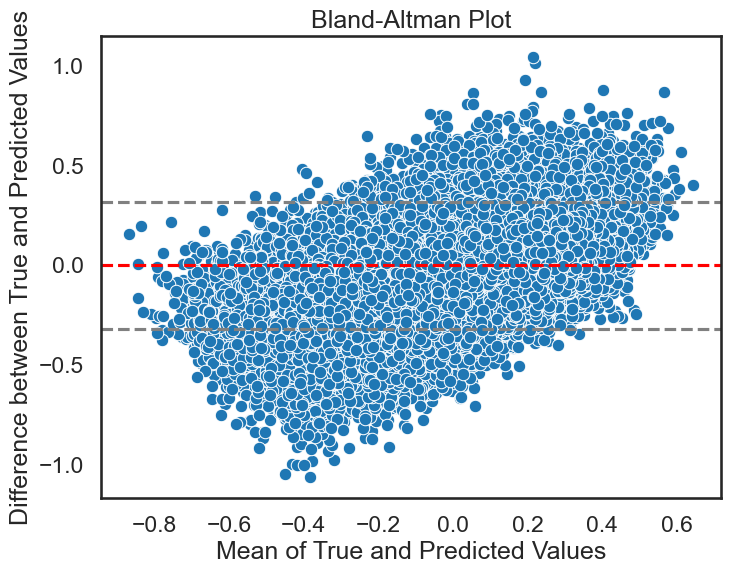

In [88]:
# Bland-Altman Plot
df['mean'] = df[['true_values', 'predicted_values']].mean(axis=1)
df['diff'] = df['true_values'] - df['predicted_values']
mean_diff = df['diff'].mean()
std_diff = df['diff'].std()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean', y='diff', data=df)
plt.axhline(mean_diff, color='red', linestyle='--')
plt.axhline(mean_diff + 1.96 * std_diff, color='grey', linestyle='--')
plt.axhline(mean_diff - 1.96 * std_diff, color='grey', linestyle='--')
plt.xlabel('Mean of True and Predicted Values')
plt.ylabel('Difference between True and Predicted Values')
plt.title('Bland-Altman Plot')
save_path = os.path.join(plots_dir, "OverlayAnalysisMegaBlandAltman.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [89]:
df = predictDataFiltered
df = predictDataFiltered.rename(columns={
    'ddG_ML': 'true_values',
    'prediction_dom': 'predicted_values'
})
df

,true_values,mut_type,mutation_pos,mutation_to,prediction_mega,y_true_mega,predicted_values,y_true_dom,mutation,wt_aa,mut_aa
0,0.274618,S1A,0,0,0.244867,0.274618,0.268696,0.274618,SA,S,A
1,0.391416,S1C,0,1,0.295403,0.391416,0.253038,0.391416,SC,S,C
2,0.329590,S1D,0,2,0.223768,0.329590,0.324191,0.329590,SD,S,D
3,0.269378,S1E,0,3,0.187730,0.269378,0.344384,0.269378,SE,S,E
4,0.456613,S1F,0,4,0.238422,0.456613,0.258794,0.456613,SF,S,F
...,...,...,...,...,...,...,...,...,...,...,...
215726,0.341185,V48N,47,11,0.090213,0.341185,0.237484,0.341185,VN,V,N
215727,0.360601,V48P,47,12,0.098666,0.360601,0.261444,0.360601,VP,V,P
215728,0.341126,V48Q,47,13,0.117495,0.341126,0.264686,0.341126,VQ,V,Q
215729,0.330819,V48S,47,15,0.117521,0.330819,0.276653,0.330819,VS,V,S


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute Comparative Statistics
correlation = df['true_values'].corr(df['predicted_values'])
mae = mean_absolute_error(df['true_values'], df['predicted_values'])
mse = mean_squared_error(df['true_values'], df['predicted_values'])
rmse = np.sqrt(mse)

print(f"Correlation: {correlation}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Correlation: 0.38499426365848016
Mean Absolute Error (MAE): 0.1751968307222284
Mean Squared Error (MSE): 0.05991357911834145
Root Mean Squared Error (RMSE): 0.24477250482507518


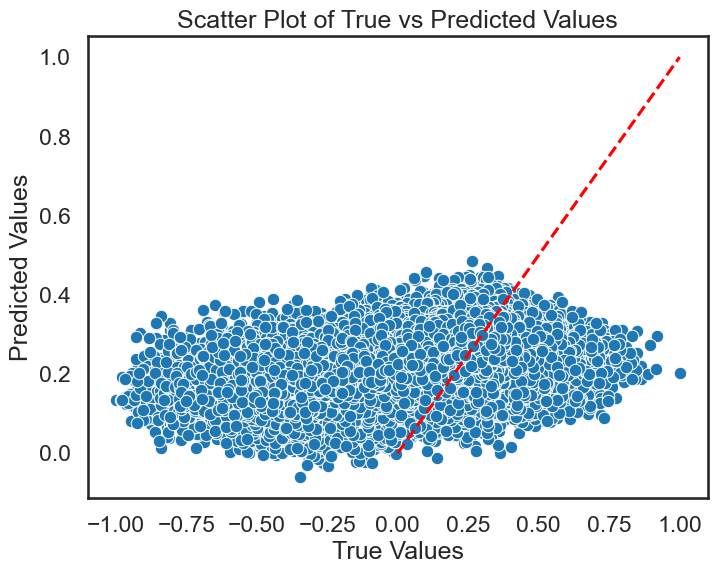

In [91]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='true_values', y='predicted_values', data=df)
plt.plot([0, max(df['true_values'])], [0, max(df['true_values'])], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')

save_path = os.path.join(plots_dir, "OverlayAnalysisDomScatterplot.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

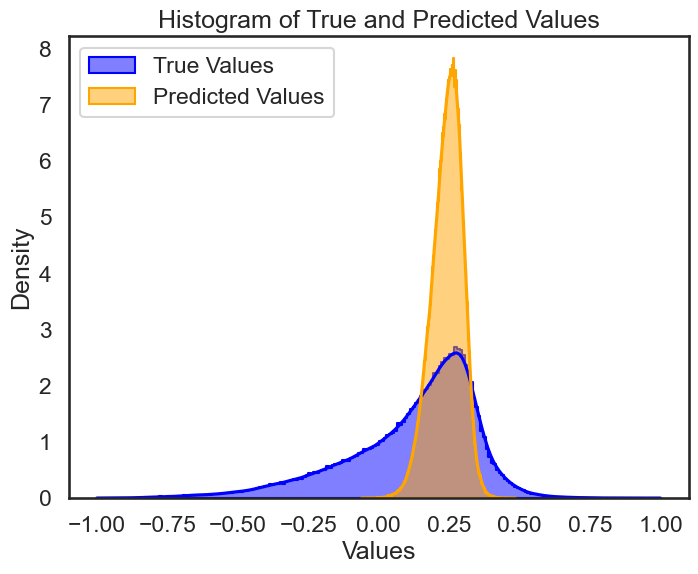

In [92]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['true_values'], color='blue', label='True Values', kde=True, element='step', stat="density")
sns.histplot(df['predicted_values'], color='orange', label='Predicted Values', kde=True, element='step', stat="density")
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of True and Predicted Values')
save_path = os.path.join(plots_dir, "OverlayAnalysisDomHistogram.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

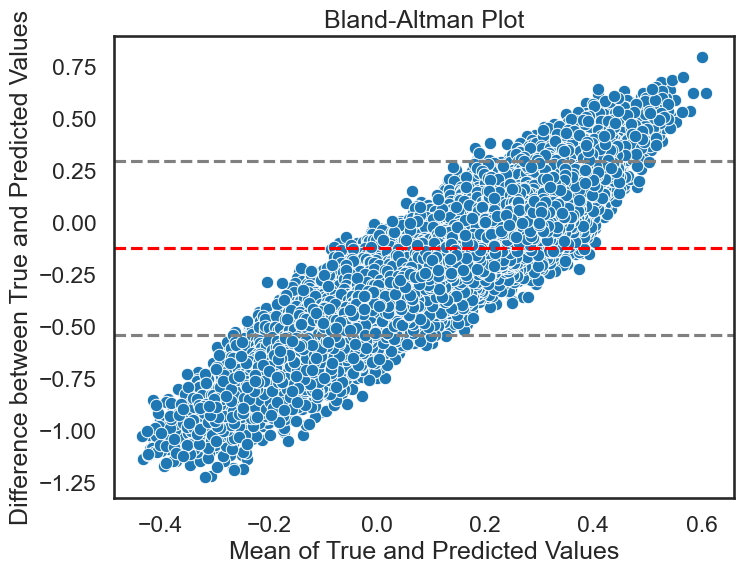

In [93]:
# Bland-Altman Plot
df['mean'] = df[['true_values', 'predicted_values']].mean(axis=1)
df['diff'] = df['true_values'] - df['predicted_values']
mean_diff = df['diff'].mean()
std_diff = df['diff'].std()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean', y='diff', data=df)
plt.axhline(mean_diff, color='red', linestyle='--')
plt.axhline(mean_diff + 1.96 * std_diff, color='grey', linestyle='--')
plt.axhline(mean_diff - 1.96 * std_diff, color='grey', linestyle='--')
plt.xlabel('Mean of True and Predicted Values')
plt.ylabel('Difference between True and Predicted Values')
plt.title('Bland-Altman Plot')
save_path = os.path.join(plots_dir, "OverlayAnalysisDomBlandAltman.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [ ]:
# Extract the original sequences and store them as a list
unique_sequences = list(set(dataDomainome['aa_seq']))
unique_sequences = unique_sequences[0:1] #selection of amount of plots that will be plotted down the line 

#Plot heatmapt of the mutations
for sequence in unique_sequences:
    # Do a subset dataset with only the info of the desired sequence
    subseq_df = df[df['aa_seq'] == sequence] 
    
    aminoacids = aa1 # list of aminoacids (these are the possible mutations that can happen
    sequence_list = list(sequence) # Split the sequence into its aminoacids
    sequence_number = [] # list that will save each aminoacid of the sequence together with its position
    
    # Asing each aminoacid of the sequence its position and save it to the list
    c = 1
    for element in sequence_list: 
        sequence_number.append(f"{element}{c}")
        c = c + 1
        
    # Get list of the mutations made for the specific sequence (to check later if there is data about the specific mutation or not          
    made_mutations_list = list(subseq_df['mut_type']) 
    
    # Create empty matrix (dataframe with the mutations as columns and the protein aminoacid sequences as index
    sequence_matrix = pd.DataFrame(columns = aminoacids, index = sequence_number)
    
    # Fill the matrix with the ddg data
    for row in sequence_matrix.iterrows():
        aa = f"{row[0]}" # Aminoacid with its position number
        aa_name = aa[0] # Aminoacid without position numbers
        ddg_values = [] # List that will have the values of all mutations for each specific aminoacid
        for a in aminoacids:
            if a != aa_name: # Don't take into account mutations to the same aminoacid: A to A
                mutation = f"{aa}{a}" # Posible mutation
                if mutation in made_mutations_list: # Check that there is ddg information about the mutations (check the made_mutations_list)
                    mutation_ddg = subseq_df.loc[subseq_df['mut_type'] == mutation]["ddG_ML"].values[0]
                    # Add the data to the matrix
                    sequence_matrix.at[aa,a] = mutation_ddg
                
    # Replace NaN with 0       
    sequence_matrix.fillna(0)
    # Transpose the matrix so when plotting the sequence is in the "x" axis and mutaitons in th "y"
    sequence_matrix_T = sequence_matrix.T
    
    # Prepare data for plotting
    array = sequence_matrix_T.to_numpy(dtype=float)  # Transform pandas dataframe into numpy array
    
    # Plot the heatmap
    plt.figure(figsize=(25,7))
    plt.imshow(array, cmap='bwr', vmin=-1, vmax=1)
        
    plt.colorbar() # Adding a color bar
    
    # Adding labels
    plt.title(f"Heat map of ddg values for the possible mutations of {sequence}")
    plt.xlabel("Original protein sequence")
    plt.ylabel("Mutation made")
    
    plt.xticks(ticks=np.arange(sequence_matrix_T.shape[1]), labels=sequence_list) # Use "sequence_number" if you want to know the position of the aminoacids
    plt.yticks(ticks=np.arange(sequence_matrix_T.shape[0]), labels=aminoacids)
    plt.show()
    plt.savefig(f"ddg_heatmap_of_mutations_for_{sequence}.png")

# 3D Ploting

In [ ]:
zinc = dataDomainome.loc[dataDomainome["domain_ID"] == 'P04150_PF00105_419']
zinc

In [ ]:
def get_pfam(row):
    return row["domain_ID"].split("_")[1]

dataDomainome["pfam_id"]=dataDomainome.apply(lambda x: get_pfam(x), axis=1)

In [ ]:
zfs = dataDomainome[dataDomainome["pfam_id"]=="PF00105"]

In [ ]:
zfs

In [ ]:
dataDomainome.loc[dataDomainome["uniprot_ID"] == "P04150"].position.min()

In [ ]:
min = data.loc[data["uniprot_ID"] == "P04150"].position.min()
max = data.loc[data["uniprot_ID"] == "P04150"].position.max()

max

In [ ]:
import matplotlib as mpl

prot="Q14995"
af_model="data/AF-"+prot+"-F1-model_v4.pdb"

min = data.loc[data["uniprot_ID"] == prot].position.min()
max = data.loc[data["uniprot_ID"] == prot].position.max()

print(max,min)

norm = mpl.colors.Normalize(vmin=-1.5, vmax=1.5)

x = data.loc[data["uniprot_ID"] == prot]
x_means = x.groupby("position").normalized_fitness.mean().reset_index()
cmap = sns.color_palette("seismic_r", as_cmap=True)
colors = [cmap(norm(i)) for i in x_means.normalized_fitness]
x_means["color"] = colors


color_dict={}
for row in x_means.iterrows():
    r = row[1]
    color=r["color"]
    hex_color = '#%02x%02x%02x' % tuple(int(c*255) for c in color[:3])
    color_dict[int(r["position"])]=hex_color


# Q2. Visualise alpha helices, beta sheets and binding sites
view = py3Dmol.view()
view.addModel(open(af_model, 'r').read(), 'pdb')
#view.hide({'resi': list(range(1, int(min)))})
#view.hide("everything")

view.setStyle({
    'cartoon': {
        'colorscheme': {
            'prop': 'resi',
            'map': color_dict,
        },
        'arrows': True,
    }
})

view.setStyle({"resi":"1-"+str(int(min))},{"hidden":True})
view.setStyle({"resi":str(int(max))+"-10000"},{"hidden":True})

view.zoomTo()
view.show()

In [ ]:
sns.set_theme("talk")
groupedPosition= data.loc[data["uniprot_ID"] == prot].groupby(["position", "mut_aa"])["normalized_fitness"].mean().reset_index()
pivot_table = groupedPosition.pivot(index='mut_aa', columns='position', values='normalized_fitness')
#pivot_table
plt.figure(figsize= (10,3))
sns.heatmap(pivot_table, cbar=True, center=0, cmap="seismic_r" )
groupedPosition

In [ ]:
view.setStyle({
    'cartoon': {
        'colorscheme': {
            'prop': 'resi',
            'map': { resi + 1: 'white' if (resi >=min and resi < max ) else 'blue' for resi in range(1000) },
        },
        'arrows': True,
    }
})

In [ ]:
print(hex_color)